In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hits = pd.concat(pd.read_excel("hits.xlsx", sheet_name=None), ignore_index=True)
hits = hits.rename(columns = {"Entity Name":"ATM ID", "MACHIN TYPE":"MACHINE", "SITE TYPE":"SITE"})
#hits = hits.sort_values(by = "ATM ID", ignore_index = True)
hits.head()

,ATM ID,MACHINE,SITE,REGION,ZONE,BRANCH_ALPHA,ADDRESS,Site Category,Txn_Type,1,...,24,25,26,27,28,29,30,31,SUM,AVG
0,1DBA00013,CAPEX(Dena),ONSITE,MMSR,MUMBAI ZONE,DBBMMO,17-HORNIMAN CIRCLE. D.NANJI BLDGS..,Site not under special category,T,10.0,...,19.0,23.0,24.0,21.0,15.0,12.0,4.0,37.0,625,20.161290
1,1DBA00281,CAPEX(Dena),ONSITE,JUNAGADH REGION,RAJKOT ZONE,DBAMRE,"GIRDHARLAL, SANGHARALAY, NEAR CITY BUS STATION",Site not under special category,T,102.0,...,85.0,137.0,118.0,122.0,103.0,102.0,27.0,131.0,3077,99.258065
2,1DBA00332,CAPEX(Dena),OFFSITE,BHAVNAGAR REGION,RAJKOT ZONE,DBSURE,main road opposite mehata market surendranaga...,Site not under special category,T,98.0,...,39.0,27.0,74.0,11.0,NaN,NaN,2.0,65.0,1846,59.548387
3,1DBA00362,CAPEX(Dena),ONSITE,KHEDA REGION,AHMEDABAD ZONE,DBSPIP,"KARMVIR LANDMARK, DESAI VAGO NADIAD, DIST: KHEDA",Site not under special category,T,NaN,...,39.0,29.0,39.0,32.0,29.0,28.0,NaN,50.0,657,21.193548
4,1DBA00392,CAPEX(Dena),ONSITE,ANAND REGION,AHMEDABAD ZONE,DHARMA,"Bank of Baroda, DHARMAJ Branch, OPPOSITE : ...",Site not under special category,T,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3,0.096774


In [3]:
hits = hits[["ATM ID","MACHINE", "SITE","REGION", "ZONE", "BRANCH_ALPHA","Site Category","SUM"]]
hits = hits.apply(lambda x: x.str.upper() if x.dtype == "object" else x) 
hits = hits.apply(lambda x: x.str.strip() if x.dtype == "object" else x) 
hits.head()

,ATM ID,MACHINE,SITE,REGION,ZONE,BRANCH_ALPHA,Site Category,SUM
0,1DBA00013,CAPEX(DENA),ONSITE,MMSR,MUMBAI ZONE,DBBMMO,SITE NOT UNDER SPECIAL CATEGORY,625
1,1DBA00281,CAPEX(DENA),ONSITE,JUNAGADH REGION,RAJKOT ZONE,DBAMRE,SITE NOT UNDER SPECIAL CATEGORY,3077
2,1DBA00332,CAPEX(DENA),OFFSITE,BHAVNAGAR REGION,RAJKOT ZONE,DBSURE,SITE NOT UNDER SPECIAL CATEGORY,1846
3,1DBA00362,CAPEX(DENA),ONSITE,KHEDA REGION,AHMEDABAD ZONE,DBSPIP,SITE NOT UNDER SPECIAL CATEGORY,657
4,1DBA00392,CAPEX(DENA),ONSITE,ANAND REGION,AHMEDABAD ZONE,DHARMA,SITE NOT UNDER SPECIAL CATEGORY,3


In [4]:
hits["Site Category"].value_counts()

SITE NOT UNDER SPECIAL CATEGORY    14171
OTHER                                824
E-LOBBY                              495
LOBBY ATM                            365
PETROL PUMP- HPCL                    246
FUTURE GROUP                         105
FOREIGNER TOURIST PLACE               52
EDUCATIONAL PLACE                     32
OTHER (MARKET AREA)                   24
RAILWAY STATION                       20
RELIGIOUS PLACE                       20
MTNL                                  18
PETROL PUMP- IOCL                     12
PETROL PUMP- BPCL                     12
E LOBBY                               12
HOSPITAL                               8
ELOBBY                                 5
OTHER (BRTS BUS STAND)                 5
OTHER (AIR FORCE  STATION)             4
ELOOBY                                 4
OTHER (ASTC BUS STAND)                 4
RAILWAR STATION                        4
SITE NOT UNDER                         4
IOCL                                   4
OTHER (RESIDENTI

In [5]:
hits.loc[hits["Site Category"].str.contains("LOBBY|LOOBY"), "Site Category"] = "E-LOBBY"
hits.loc[hits["Site Category"].str.contains("NOT UNDER"), "Site Category"] = "SITE NOT UNDER SPECIAL CATEGORY"
hits.loc[hits["Site Category"].str.contains("RAILWAY|RAILWAR"), "Site Category"] = "RAILWAY STATION"
hits.loc[hits["Site Category"].str.contains("AIRPORT"), "Site Category"] = "AIRPORT"
hits.loc[hits["Site Category"].str.contains("PETROL|BPCL|IOCL"), "Site Category"] = "PETROL PUMP"
hits.loc[hits["Site Category"].str.contains("BUS"), "Site Category"] = "BUS STAND"
hits.loc[hits["Site Category"].str.contains("MARKET"), "Site Category"] = "MARKET"
hits.loc[hits["Site Category"].str.contains("OTHER|PSK|ONSITE"), "Site Category"] = "OTHER"
hits["Site Category"].value_counts()

SITE NOT UNDER SPECIAL CATEGORY    14175
E-LOBBY                              881
OTHER                                844
PETROL PUMP                          277
FUTURE GROUP                         105
FOREIGNER TOURIST PLACE               52
EDUCATIONAL PLACE                     32
RAILWAY STATION                       24
MARKET                                24
RELIGIOUS PLACE                       20
MTNL                                  18
BUS STAND                             13
HOSPITAL                               8
AIRPORT                                4
Name: Site Category, dtype: int64

In [6]:
g = hits.groupby("ATM ID")
atm_list = g.sum().index
for name in atm_list:
    print(g.get_group(name))
    
## Region does not seem relevant since for ATMs with same id, regions are varying in some cases

           MACHINE    SITE                     REGION         ZONE  \
0      CAPEX(DENA)  ONSITE                       MMSR  MUMBAI ZONE   
4212   CAPEX(DENA)  ONSITE                       MMSR  MUMBAI ZONE   
8324   CAPEX(DENA)  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE   
12390  CAPEX(DENA)  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category  SUM  
0           DBBMMO  SITE NOT UNDER SPECIAL CATEGORY  625  
4212        DBBMMO  SITE NOT UNDER SPECIAL CATEGORY  808  
8324        DBBMMO  SITE NOT UNDER SPECIAL CATEGORY  986  
12390       DBBMMO  SITE NOT UNDER SPECIAL CATEGORY  954  
           MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
1      CAPEX(DENA)  ONSITE   JUNAGADH REGION  RAJKOT ZONE       DBAMRE   
4213   CAPEX(DENA)  ONSITE   JUNAGADH REGION  RAJKOT ZONE       DBAMRE   
8325   CAPEX(DENA)  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE       DBAMRE   
12391  CAPEX(DENA)  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE 

12432  SITE NOT UNDER SPECIAL CATEGORY  2383  
           MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
49     CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBBLDI   
4259   CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBBLDI   
8369   CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBBLDI   
12433  CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBBLDI   

                         Site Category   SUM  
49     SITE NOT UNDER SPECIAL CATEGORY  2379  
4259   SITE NOT UNDER SPECIAL CATEGORY  3200  
8369   SITE NOT UNDER SPECIAL CATEGORY  2011  
12433  SITE NOT UNDER SPECIAL CATEGORY  2730  
           MACHINE     SITE               REGION            ZONE BRANCH_ALPHA  \
50     CAPEX(DENA)  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBKANO   
8370   CAPEX(DENA)  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBKANO   
12434  CAPEX(DENA)  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBK

12473       DBBECK  SITE NOT UNDER SPECIAL CATEGORY  505  
           MACHINE    SITE                REGION            ZONE BRANCH_ALPHA  \
92     CAPEX(DENA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE        DBLAW   
4303   CAPEX(DENA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE        DBLAW   
8412   CAPEX(DENA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE        DBLAW   
12474  CAPEX(DENA)  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE        DBLAW   

                         Site Category  SUM  
92     SITE NOT UNDER SPECIAL CATEGORY  123  
4303   SITE NOT UNDER SPECIAL CATEGORY  226  
8412   SITE NOT UNDER SPECIAL CATEGORY  182  
12474  SITE NOT UNDER SPECIAL CATEGORY  168  
           MACHINE    SITE                 REGION            ZONE  \
93     CAPEX(DENA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
4304   CAPEX(DENA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
8413   CAPEX(DENA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
12475  CAPEX(DENA)  ONSITE  A

           MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
134    CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBVERA   
4347   CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBVERA   
8456   CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBVERA   
12516  CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBVERA   

                         Site Category  SUM  
134    SITE NOT UNDER SPECIAL CATEGORY  763  
4347   SITE NOT UNDER SPECIAL CATEGORY  825  
8456   SITE NOT UNDER SPECIAL CATEGORY  680  
12516  SITE NOT UNDER SPECIAL CATEGORY  657  
          MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
135   CAPEX(DENA)  ONSITE  KHEDA REGION  AHMEDABAD ZONE       DBKHED   
4348  CAPEX(DENA)  ONSITE  KHEDA REGION  AHMEDABAD ZONE       DBKHED   
8457  CAPEX(DENA)  ONSITE  KHEDA REGION  AHMEDABAD ZONE       DBKHED   

                        Site Category   SUM  
135   SITE NOT UNDER SPECIAL CATEGORY  

12558  SITE NOT UNDER SPECIAL CATEGORY  1896  
           MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
180    CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBBPAL   
4391   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBBPAL   
8501   CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBBPAL   
12559  CAPEX(DENA)  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBBPAL   

                         Site Category   SUM  
180    SITE NOT UNDER SPECIAL CATEGORY  1669  
4391   SITE NOT UNDER SPECIAL CATEGORY  2056  
8501   SITE NOT UNDER SPECIAL CATEGORY  2212  
12559  SITE NOT UNDER SPECIAL CATEGORY  2019  
           MACHINE     SITE       REGION         ZONE BRANCH_ALPHA  \
181    CAPEX(DENA)  OFFSITE  BHUJ REGION  RAJKOT ZONE       DBPDRO   
4392   CAPEX(DENA)  OFFSITE  BHUJ REGION  RAJKOT ZONE       DBPDRO   
8502   CAPEX(DENA)  OFFSITE  BHUJ REGION  RAJKOT ZONE       DBPDRO   
12560  CAPEX(DENA)  OFFSITE  BHUJ REG

12606  SITE NOT UNDER SPECIAL CATEGORY  2972  
           MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
228    CAPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBMPAR   
4438   CAPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBMPAR   
8548   CAPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBMPAR   
12607  CAPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBMPAR   

                         Site Category   SUM  
228    SITE NOT UNDER SPECIAL CATEGORY  1002  
4438   SITE NOT UNDER SPECIAL CATEGORY  1024  
8548   SITE NOT UNDER SPECIAL CATEGORY  1029  
12607  SITE NOT UNDER SPECIAL CATEGORY  1294  
           MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
229    CAPEX(DENA)  ONSITE  JUNAGADH REGION  RAJKOT ZONE       DBALID   
4439   CAPEX(DENA)  ONSITE  JUNAGADH REGION  RAJKOT ZONE       DBALID   
8549   CAPEX(DENA)  ONSITE  JUNAGADH REGION  RAJKOT ZONE       DBALID   
12608  CAPEX(DENA)  ONSITE  JUNAGADH REGION  RAJKOT ZONE       DBALID 

12645  SITE NOT UNDER SPECIAL CATEGORY   141  
           MACHINE    SITE          REGION          ZONE BRANCH_ALPHA  \
269    CAPEX(DENA)  ONSITE  BURDWAN REGION  KOLKATA ZONE       DBSRIP   
4477   CAPEX(DENA)  ONSITE  BURDWAN REGION  KOLKATA ZONE       DBSRIP   
8588   CAPEX(DENA)  ONSITE  BURDWAN REGION  KOLKATA ZONE       DBSRIP   
12646  CAPEX(DENA)  ONSITE  BURDWAN REGION  KOLKATA ZONE       DBSRIP   

                         Site Category   SUM  
269    SITE NOT UNDER SPECIAL CATEGORY  1917  
4477   SITE NOT UNDER SPECIAL CATEGORY  1341  
8588   SITE NOT UNDER SPECIAL CATEGORY  2040  
12646  SITE NOT UNDER SPECIAL CATEGORY  1481  
          MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
270   CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBMPUR   
4478  CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBMPUR   
8589  CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBMPUR   

                        Site Category  

12687  SITE NOT UNDER SPECIAL CATEGORY  1160  
      MACHINE     SITE                 REGION            ZONE BRANCH_ALPHA  \
311     CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       PANDUP   
4520    CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       PANDUP   
8629    CAPEX   ONSITE   AHMEDABAD - I REGION  AHMEDABAD ZONE       PANDUP   
12688   CAPEX   ONSITE   AHMEDABAD - I REGION  AHMEDABAD ZONE       PANDUP   

                         Site Category   SUM  
311    SITE NOT UNDER SPECIAL CATEGORY  3937  
4520   SITE NOT UNDER SPECIAL CATEGORY  5324  
8629   SITE NOT UNDER SPECIAL CATEGORY  4220  
12688  SITE NOT UNDER SPECIAL CATEGORY  4650  
      MACHINE     SITE                 REGION            ZONE BRANCH_ALPHA  \
312     CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       NEWAHM   
4521    CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       NEWAHM   
8630    CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       NEWAHM   
12689   CAPEX  

12726  SITE NOT UNDER SPECIAL CATEGORY  2014  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
355     CAPEX  ONSITE       GORAKHPUR REGION  LUCKNOW ZONE       BIJAUR   
4557    CAPEX  ONSITE       GORAKHPUR REGION  LUCKNOW ZONE       BIJAUR   
8665    CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       BIJAUR   
12727   CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       BIJAUR   

                         Site Category   SUM  
355    SITE NOT UNDER SPECIAL CATEGORY  4195  
4557   SITE NOT UNDER SPECIAL CATEGORY  3935  
8665   SITE NOT UNDER SPECIAL CATEGORY  4742  
12727  SITE NOT UNDER SPECIAL CATEGORY  4613  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
356     CAPEX  ONSITE       GORAKHPUR REGION  LUCKNOW ZONE       RAGGHU   
4558    CAPEX  ONSITE       GORAKHPUR REGION  LUCKNOW ZONE       RAGGHU   
8666    CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       RAGGHU   
12728   CAPEX  ONSITE  AMBEDKAR NAGAR REGI

12767  SITE NOT UNDER SPECIAL CATEGORY  1815  
    MACHINE     SITE               REGION            ZONE BRANCH_ALPHA  \
403   CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE         DAMA   

                       Site Category   SUM  
403  SITE NOT UNDER SPECIAL CATEGORY  1462  
    MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
404   CAPEX  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       SAVAGA   

                       Site Category   SUM  
404  SITE NOT UNDER SPECIAL CATEGORY  1225  
      MACHINE     SITE               REGION            ZONE BRANCH_ALPHA  \
8709    CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE         DAMA   
12768   CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE         DAMA   

                         Site Category   SUM  
8709   SITE NOT UNDER SPECIAL CATEGORY  1056  
12768  SITE NOT UNDER SPECIAL CATEGORY  1546  
      MACHINE     SITE               REGION            ZONE BRANCH_ALPHA  \
405     CAPEX  OFFSITE  BANAS K

12804       E-LOBBY  1428  
      MACHINE    SITE                       REGION         ZONE BRANCH_ALPHA  \
448     CAPEX  ONSITE                         MMER  MUMBAI ZONE       KANJUR   
4642    CAPEX  ONSITE                         MMER  MUMBAI ZONE       KANJUR   
8745    CAPEX  ONSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       KANJUR   
12805   CAPEX  ONSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       KANJUR   

                         Site Category   SUM  
448    SITE NOT UNDER SPECIAL CATEGORY  1330  
4642   SITE NOT UNDER SPECIAL CATEGORY   611  
8745   SITE NOT UNDER SPECIAL CATEGORY  1343  
12805  SITE NOT UNDER SPECIAL CATEGORY  2236  
      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
449     CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       BORIVL   
4643    CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       BORIVL   
8746    CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       BORIVL   
12806   CAPEX  OFFSI

    MACHINE     SITE REGION         ZONE BRANCH_ALPHA  \
487   CAPEX  OFFSITE   MMER  MUMBAI ZONE       BHABOM   

                       Site Category  SUM  
487  SITE NOT UNDER SPECIAL CATEGORY    2  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
488     CAPEX  ONSITE                      MMER  MUMBAI ZONE       SHATHA   
4679    CAPEX  ONSITE                      MMER  MUMBAI ZONE       SHATHA   
8777    CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       SHATHA   
12839   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       SHATHA   

      Site Category   SUM  
488     PETROL PUMP  1876  
4679    PETROL PUMP  2412  
8777    PETROL PUMP  2400  
12839   PETROL PUMP  3371  
     MACHINE     SITE REGION         ZONE BRANCH_ALPHA Site Category  SUM
489    CAPEX  OFFSITE   MMER  MUMBAI ZONE       BHITHA   PETROL PUMP  527
4680   CAPEX  OFFSITE   MMER  MUMBAI ZONE       BHITHA   PETROL PUMP  209
      MACHINE     SITE                     REGION

      MACHINE     SITE                    REGION         ZONE BRANCH_ALPHA  \
528     CAPEX  OFFSITE                      MMER  MUMBAI ZONE       GHODBA   
4713    CAPEX  OFFSITE                      MMER  MUMBAI ZONE       GHODBA   
8808    CAPEX  OFFSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       GHODBA   
12868   CAPEX      NaN  MUMBAI METRO EAST REGION  MUMBAI ZONE          NaN   

                         Site Category   SUM  
528    SITE NOT UNDER SPECIAL CATEGORY  1046  
4713   SITE NOT UNDER SPECIAL CATEGORY  1136  
8808   SITE NOT UNDER SPECIAL CATEGORY   790  
12868  SITE NOT UNDER SPECIAL CATEGORY   158  
     MACHINE     SITE REGION         ZONE BRANCH_ALPHA  \
4714   CAPEX  OFFSITE    NMR  MUMBAI ZONE       PANVEL   

                        Site Category  SUM  
4714  SITE NOT UNDER SPECIAL CATEGORY    1  
    MACHINE     SITE REGION         ZONE BRANCH_ALPHA  \
529   CAPEX  OFFSITE   MMSR  MUMBAI ZONE       SIRPMR   

                       Site Category  SUM  
529  SIT

12916  SITE NOT UNDER SPECIAL CATEGORY  5841  
      MACHINE    SITE                 REGION         ZONE BRANCH_ALPHA  \
583     CAPEX  ONSITE       BHAVNAGAR REGION  RAJKOT ZONE        BOTAD   
4769    CAPEX  ONSITE       BHAVNAGAR REGION  RAJKOT ZONE        BOTAD   
8858    CAPEX  ONSITE  BHAVNAGAR - II REGION  RAJKOT ZONE        BOTAD   
12917   CAPEX  ONSITE  BHAVNAGAR - II REGION  RAJKOT ZONE        BOTAD   

                         Site Category   SUM  
583    SITE NOT UNDER SPECIAL CATEGORY  3756  
4769   SITE NOT UNDER SPECIAL CATEGORY  4540  
8858   SITE NOT UNDER SPECIAL CATEGORY  5046  
12917  SITE NOT UNDER SPECIAL CATEGORY  4089  
      MACHINE     SITE                 REGION         ZONE BRANCH_ALPHA  \
584     CAPEX  OFFSITE       BHAVNAGAR REGION  RAJKOT ZONE        BOTAD   
4770    CAPEX  OFFSITE       BHAVNAGAR REGION  RAJKOT ZONE        BOTAD   
8859    CAPEX  OFFSITE  BHAVNAGAR - II REGION  RAJKOT ZONE        BOTAD   
12918   CAPEX  OFFSITE  BHAVNAGAR - II REGION  

12957  SITE NOT UNDER SPECIAL CATEGORY  3589  
     MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
631    CAPEX  OFFSITE  FAIZABAD REGION  LUCKNOW ZONE        GONDA   
4812   CAPEX  OFFSITE  FAIZABAD REGION  LUCKNOW ZONE        GONDA   

                        Site Category  SUM  
631   SITE NOT UNDER SPECIAL CATEGORY  235  
4812  SITE NOT UNDER SPECIAL CATEGORY  125  
    MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
632   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       HANUMA   

                       Site Category  SUM  
632  SITE NOT UNDER SPECIAL CATEGORY   41  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
633     CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE        NOHAR   
4813    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE        NOHAR   
8899    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE        NOHAR   
12958   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE        NOHAR   

                         Site Category   SUM  
633   

12994  SITE NOT UNDER SPECIAL CATEGORY  1891  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
671     CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       SARJOD   
4844    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       SARJOD   
8936    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       SARJOD   
12995   CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       SARJOD   

                         Site Category   SUM  
671    SITE NOT UNDER SPECIAL CATEGORY  1164  
4844   SITE NOT UNDER SPECIAL CATEGORY   940  
8936   SITE NOT UNDER SPECIAL CATEGORY  1242  
12995  SITE NOT UNDER SPECIAL CATEGORY  1235  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA Site Category  \
672     CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       KUDIBH       E-LOBBY   
4845    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       KUDIBH       E-LOBBY   
8937    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       KUDIBH       E-LOBBY   
12996   CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE   

      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
715     CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       YASODH   
4886    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       YASODH   
8978    CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       YASODH   
13034   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       YASODH   

                         Site Category   SUM  
715    SITE NOT UNDER SPECIAL CATEGORY   642  
4886   SITE NOT UNDER SPECIAL CATEGORY   332  
8978   SITE NOT UNDER SPECIAL CATEGORY  2584  
13034  SITE NOT UNDER SPECIAL CATEGORY  1634  
     MACHINE     SITE         REGION          ZONE BRANCH_ALPHA  \
716    CAPEX  OFFSITE  KANPUR REGION  LUCKNOW ZONE       KALKAN   
4887   CAPEX  OFFSITE  KANPUR REGION  LUCKNOW ZONE       KALKAN   

                        Site Category   SUM  
716   SITE NOT UNDER SPECIAL CATEGORY  2884  
4887  SITE NOT UNDER SPECIAL CATEGORY  1667  
      MACHINE     SITE               REGION          ZONE B

      MACHINE     SITE                 REGION         ZONE BRANCH_ALPHA  \
765     CAPEX  OFFSITE           AJMER REGION  JAIPUR ZONE        DEOLI   
4935    CAPEX  OFFSITE           AJMER REGION  JAIPUR ZONE        DEOLI   
9028    CAPEX  OFFSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE        DEOLI   
13083   CAPEX  OFFSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE        DEOLI   

                         Site Category   SUM  
765    SITE NOT UNDER SPECIAL CATEGORY  1962  
4935   SITE NOT UNDER SPECIAL CATEGORY  1568  
9028   SITE NOT UNDER SPECIAL CATEGORY   914  
13083  SITE NOT UNDER SPECIAL CATEGORY  1097  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
766     CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       JHALIJ   
4936    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       JHALIJ   
9029    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       JHALIJ   
13084   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       JHALIJ   

                         Site Category  SUM  
766    SITE NOT UNDER 

13127  FUTURE GROUP  4447  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
814     CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       STAGAR   
4975    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       STAGAR   
9073    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       STAGAR   
13128   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       STAGAR   

                         Site Category   SUM  
814    SITE NOT UNDER SPECIAL CATEGORY  2089  
4975   SITE NOT UNDER SPECIAL CATEGORY  2305  
9073   SITE NOT UNDER SPECIAL CATEGORY  2851  
13128  SITE NOT UNDER SPECIAL CATEGORY  2698  
      MACHINE     SITE                   REGION          ZONE BRANCH_ALPHA  \
815     CAPEX  OFFSITE   GREATER KOLKATA REGION  KOLKATA ZONE       KAKDWI   
4976    CAPEX  OFFSITE   GREATER KOLKATA REGION  KOLKATA ZONE       KAKDWI   
9074    CAPEX  OFFSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       KAKDWI   
13129   CAPEX  OFFSITE  KOLKATA METRO -2 REGION  

      MACHINE     SITE                 REGION         ZONE BRANCH_ALPHA  \
862     CAPEX  OFFSITE           AJMER REGION  JAIPUR ZONE        DEOLI   
5021    CAPEX  OFFSITE           AJMER REGION  JAIPUR ZONE        DEOLI   
9117    CAPEX  OFFSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE        DEOLI   
13174   CAPEX  OFFSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE        DEOLI   

                         Site Category   SUM  
862    SITE NOT UNDER SPECIAL CATEGORY  3467  
5021   SITE NOT UNDER SPECIAL CATEGORY  2460  
9117   SITE NOT UNDER SPECIAL CATEGORY  2197  
13174  SITE NOT UNDER SPECIAL CATEGORY  2032  
      MACHINE     SITE                 REGION         ZONE BRANCH_ALPHA  \
863     CAPEX  OFFSITE           AJMER REGION  JAIPUR ZONE         TONK   
5022    CAPEX  OFFSITE           AJMER REGION  JAIPUR ZONE         TONK   
9118    CAPEX  OFFSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE         TONK   
13175   CAPEX  OFFSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE         TONK   

             

      MACHINE    SITE                 REGION            ZONE BRANCH_ALPHA  \
915     CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       ISANPU   
5073    CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       ISANPU   
9163    CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       ISANPU   
13222   CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       ISANPU   

                         Site Category    SUM  
915    SITE NOT UNDER SPECIAL CATEGORY   7087  
5073   SITE NOT UNDER SPECIAL CATEGORY   9779  
9163   SITE NOT UNDER SPECIAL CATEGORY  11411  
13222  SITE NOT UNDER SPECIAL CATEGORY   5112  
      MACHINE    SITE                 REGION            ZONE BRANCH_ALPHA  \
5074    CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       ASARWA   
9164    CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       ASARWA   
13223   CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       ASARWA   

                         Site Category  SUM  
5074   SITE NOT UND

13264  SITE NOT UNDER SPECIAL CATEGORY  4043  
      MACHINE    SITE                  REGION            ZONE BRANCH_ALPHA  \
960     CAPEX  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE       SATAHM   
5115    CAPEX  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE       SATAHM   
9206    CAPEX  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE       SATAHM   
13265   CAPEX  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE       SATAHM   

                         Site Category   SUM  
960    SITE NOT UNDER SPECIAL CATEGORY  3828  
5115   SITE NOT UNDER SPECIAL CATEGORY  2973  
9206   SITE NOT UNDER SPECIAL CATEGORY  4130  
13265  SITE NOT UNDER SPECIAL CATEGORY  2182  
      MACHINE     SITE                 REGION            ZONE BRANCH_ALPHA  \
961     CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       DARIAP   
5116    CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       DARIAP   
9207    CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       DARIAP   
13266   CAPEX  

      MACHINE    SITE        REGION         ZONE BRANCH_ALPHA  \
1014    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       JETHAN   
5169    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       JETHAN   
9259    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       JETHAN   
13317   CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       JETHAN   

                         Site Category  SUM  
1014   SITE NOT UNDER SPECIAL CATEGORY  464  
5169   SITE NOT UNDER SPECIAL CATEGORY  777  
9259   SITE NOT UNDER SPECIAL CATEGORY  757  
13317  SITE NOT UNDER SPECIAL CATEGORY  593  
      MACHINE    SITE        REGION         ZONE BRANCH_ALPHA  \
1015    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE        KIRAP   
5170    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE        KIRAP   
9260    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE        KIRAP   
13318   CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE        KIRAP   

                         Site Category   SUM  
1015   SITE NOT UNDER SPECIAL CATEGORY  1027  
5170   SITE NOT UNDER SP

13374  SITE NOT UNDER SPECIAL CATEGORY    29  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
1072    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       MEZARO   
5227    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       MEZARO   
9315    CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       MEZARO   
13375   CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       MEZARO   

                         Site Category   SUM  
1072   SITE NOT UNDER SPECIAL CATEGORY   725  
5227   SITE NOT UNDER SPECIAL CATEGORY  3206  
9315   SITE NOT UNDER SPECIAL CATEGORY  4816  
13375  SITE NOT UNDER SPECIAL CATEGORY  3083  
      MACHINE     SITE            REGION          ZONE BRANCH_ALPHA  \
1073    CAPEX  OFFSITE  ALLAHABAD REGION  LUCKNOW ZONE       PADILA   
5228    CAPEX  OFFSITE  ALLAHABAD REGION  LUCKNOW ZONE       PADILA   
9316    CAPEX  OFFSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       PADILA   
13376   CAPEX  OFFSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       PADILA   

           

      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
1119    CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE        JAMON   
5273    CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE        JAMON   
9362    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE        JAMON   
13421   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE        JAMON   

                         Site Category   SUM  
1119   SITE NOT UNDER SPECIAL CATEGORY  3056  
5273   SITE NOT UNDER SPECIAL CATEGORY  3757  
9362   SITE NOT UNDER SPECIAL CATEGORY  2452  
13421  SITE NOT UNDER SPECIAL CATEGORY  1821  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
1120    CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE        ODARI   
5274    CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE        ODARI   
9363    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE        ODARI   
13422   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE        ODARI   

                         Site Category   SUM  
1120   SITE NOT 

13478  SITE NOT UNDER SPECIAL CATEGORY  4818  
      MACHINE     SITE        REGION            ZONE BRANCH_ALPHA  \
1175    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE        PALAJ   
5331    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE        PALAJ   
9419    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE        PALAJ   
13479   CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE        PALAJ   

                         Site Category   SUM  
1175   SITE NOT UNDER SPECIAL CATEGORY  2552  
5331   SITE NOT UNDER SPECIAL CATEGORY  1588  
9419   SITE NOT UNDER SPECIAL CATEGORY  2255  
13479  SITE NOT UNDER SPECIAL CATEGORY  3067  
      MACHINE     SITE        REGION            ZONE BRANCH_ALPHA  \
1176    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       GAMBHI   
5332    CAPEX  OFFSITE  ANAND REGION  AHMEDABAD ZONE       GAMBHI   
9420    CAPEX   ONSITE  ANAND REGION  AHMEDABAD ZONE       GAMBHI   
13480   CAPEX   ONSITE  ANAND REGION  AHMEDABAD ZONE       GAMBHI   

                         S

      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1217    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       TINDWA   
5371    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       TINDWA   
9459    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       TINDWA   
13520   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       TINDWA   

                         Site Category   SUM  
1217   SITE NOT UNDER SPECIAL CATEGORY  1814  
5371   SITE NOT UNDER SPECIAL CATEGORY  2983  
9459   SITE NOT UNDER SPECIAL CATEGORY  3387  
13520  SITE NOT UNDER SPECIAL CATEGORY  2760  
      MACHINE     SITE          REGION          ZONE BRANCH_ALPHA  \
1218    CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       BOLPUR   
5372    CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       BOLPUR   
9460    CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       BOLPUR   
13521   CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       BOLPUR   

                         Site Category   SUM  
1218   SITE NOT UNDER SPEC

      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
1267    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE         ASHA   
5421    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE         ASHA   
9507    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE         ASHA   
13569   CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE         ASHA   

      Site Category   SUM  
1267        E-LOBBY  6171  
5421        E-LOBBY  4084  
9507        E-LOBBY  4444  
13569       E-LOBBY  4356  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
1268    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       SAKARG   
5422    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       SAKARG   
9508    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       SAKARG   
13570   CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       SAKARG   

      Site Category   SUM  
1268        E-LOBBY  2075  
5422        E-LOBBY  3074  
9508        E-LOBBY  2630  
13570       E-LOBBY  2895  
      MACHINE    SITE           REGION

13610  3843  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
1312    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       JAIBIK   
5466    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       JAIBIK   
9547    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       JAIBIK   
13611   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       JAIBIK   

                         Site Category   SUM  
1312   SITE NOT UNDER SPECIAL CATEGORY  4036  
5466   SITE NOT UNDER SPECIAL CATEGORY  3803  
9547   SITE NOT UNDER SPECIAL CATEGORY  3138  
13611  SITE NOT UNDER SPECIAL CATEGORY  2291  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
1313    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       SRIDUN   
5467    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       SRIDUN   
9548    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       SRIDUN   
13612   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       SRIDUN   

                         Site Category   SUM  
1313   SITE NOT UNDER SPECI

     MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
1362   CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE         DAMA   
5513   CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE         DAMA   
9595   CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE         DAMA   

                        Site Category   SUM  
1362  SITE NOT UNDER SPECIAL CATEGORY   313  
5513  SITE NOT UNDER SPECIAL CATEGORY  1393  
9595  SITE NOT UNDER SPECIAL CATEGORY   882  
      MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
1363    CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       CHADOT   
5514    CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       CHADOT   
9596    CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       CHADOT   
13657   CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       CHADOT   

                         Site Category   SUM  
1363   SITE NOT UNDER SPECIAL CATEGORY  1609  
5514   SITE NOT UNDER SPECIAL CATEGORY  2210  
95

      MACHINE     SITE                    REGION         ZONE BRANCH_ALPHA  \
1410    CAPEX  OFFSITE                      MMWR  MUMBAI ZONE       SAKINA   
5561    CAPEX  OFFSITE                      MMWR  MUMBAI ZONE       SAKINA   
9644    CAPEX  OFFSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE       SAKINA   
13703   CAPEX  OFFSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE       SAKINA   

                         Site Category   SUM  
1410   SITE NOT UNDER SPECIAL CATEGORY  4324  
5561   SITE NOT UNDER SPECIAL CATEGORY  5349  
9644   SITE NOT UNDER SPECIAL CATEGORY  5897  
13703  SITE NOT UNDER SPECIAL CATEGORY  7848  
      MACHINE    SITE                       REGION         ZONE BRANCH_ALPHA  \
1411    CAPEX  ONSITE                         MMCR  MUMBAI ZONE       GHAWES   
5562    CAPEX  ONSITE                         MMCR  MUMBAI ZONE       GHAWES   
9645    CAPEX  ONSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       GHAWES   
13704   CAPEX  ONSITE  MUMBAI METRO CENTRAL REGION  MU

      MACHINE     SITE       REGION         ZONE BRANCH_ALPHA  \
1462    CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE        BARAN   
5612    CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE        BARAN   
9696    CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE        BARAN   
13755   CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE        BARAN   

                         Site Category   SUM  
1462   SITE NOT UNDER SPECIAL CATEGORY  2640  
5612   SITE NOT UNDER SPECIAL CATEGORY  3697  
9696   SITE NOT UNDER SPECIAL CATEGORY  3752  
13755  SITE NOT UNDER SPECIAL CATEGORY  3084  
      MACHINE     SITE       REGION         ZONE BRANCH_ALPHA  \
1463    CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       CHHIPA   
5613    CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       CHHIPA   
9697    CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       CHHIPA   
13756   CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       CHHIPA   

                         Site Category   SUM  
1463   SITE NOT UNDER SPECIAL CATEGORY  1669  
5613   SITE NOT UND

      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1502    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       SACDBS   
5653    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       SACDBS   
9737    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       SACDBS   
13796   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       SACDBS   

                         Site Category   SUM  
1502   SITE NOT UNDER SPECIAL CATEGORY  3569  
5653   SITE NOT UNDER SPECIAL CATEGORY  4934  
9737   SITE NOT UNDER SPECIAL CATEGORY  4931  
13796  SITE NOT UNDER SPECIAL CATEGORY  5508  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1503    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       NAUBBS   
5654    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       NAUBBS   
9738    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       NAUBBS   
13797   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       NAUBBS   

                         Site Category   SUM  
1503   SITE NOT UNDER SPEC

13849  SITE NOT UNDER SPECIAL CATEGORY  2942  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
1557    CAPEX  ONSITE   UDAIPUR REGION  JAIPUR ZONE       CHIDUN   
5709    CAPEX  ONSITE   UDAIPUR REGION  JAIPUR ZONE       CHIDUN   
9790    CAPEX  ONSITE  BANSWARA REGION  JAIPUR ZONE       CHIDUN   
13850   CAPEX  ONSITE  BANSWARA REGION  JAIPUR ZONE       CHIDUN   

                         Site Category   SUM  
1557   SITE NOT UNDER SPECIAL CATEGORY  4059  
5709   SITE NOT UNDER SPECIAL CATEGORY  3935  
9790   SITE NOT UNDER SPECIAL CATEGORY  3776  
13850  SITE NOT UNDER SPECIAL CATEGORY  2902  
      MACHINE     SITE           REGION         ZONE BRANCH_ALPHA  \
1558    CAPEX  OFFSITE   UDAIPUR REGION  JAIPUR ZONE       PINDAW   
5710    CAPEX  OFFSITE   UDAIPUR REGION  JAIPUR ZONE       PINDAW   
9791    CAPEX  OFFSITE  BANSWARA REGION  JAIPUR ZONE       PINDAW   
13851   CAPEX  OFFSITE  BANSWARA REGION  JAIPUR ZONE       PINDAW   

                         Site C

13890  SITE NOT UNDER SPECIAL CATEGORY  2677  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1599    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       KOTIYA   
5751    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       KOTIYA   
9831    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       KOTIYA   
13891   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       KOTIYA   

                         Site Category   SUM  
1599   SITE NOT UNDER SPECIAL CATEGORY  1365  
5751   SITE NOT UNDER SPECIAL CATEGORY  1103  
9831   SITE NOT UNDER SPECIAL CATEGORY  1493  
13891  SITE NOT UNDER SPECIAL CATEGORY  1707  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1600    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       PATTIS   
5752    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       PATTIS   
9832    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       PATTIS   
13892   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       PATTIS   

                         S

13934  SITE NOT UNDER SPECIAL CATEGORY  1438  
      MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
1643    CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE        KALOL   
5795    CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE        KALOL   
9874    CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE        KALOL   
13935   CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE        KALOL   

                         Site Category   SUM  
1643   SITE NOT UNDER SPECIAL CATEGORY  4997  
5795   SITE NOT UNDER SPECIAL CATEGORY  5392  
9874   SITE NOT UNDER SPECIAL CATEGORY  5387  
13935  SITE NOT UNDER SPECIAL CATEGORY  4182  
      MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
1644    CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       GANDHI   
5796    CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       GANDHI   
9875    CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       GANDHI   
13936   CAPEX  ONSITE  GANDHINAGAR REGION  AHM

      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
1693    CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       BAKSHI   
5847    CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       BAKSHI   
9926    CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       BAKSHI   
13987   CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       BAKSHI   

                         Site Category   SUM  
1693   SITE NOT UNDER SPECIAL CATEGORY  1294  
5847   SITE NOT UNDER SPECIAL CATEGORY  1069  
9926   SITE NOT UNDER SPECIAL CATEGORY  1631  
13987  SITE NOT UNDER SPECIAL CATEGORY  2195  
      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
1694    CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       ANTBAG   
5848    CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       ANTBAG   
9927    CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       ANTBAG   
13988   CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       ANTB

      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
1747    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       INDBAI   
5901    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       INDBAI   
9981    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       INDBAI   
14042   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       INDBAI   

                         Site Category   SUM  
1747   SITE NOT UNDER SPECIAL CATEGORY  2150  
5901   SITE NOT UNDER SPECIAL CATEGORY  4433  
9981   SITE NOT UNDER SPECIAL CATEGORY  5847  
14042  SITE NOT UNDER SPECIAL CATEGORY  4419  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
1748    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       MAHAPU   
5902    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       MAHAPU   
9982    CAPEX  ONSITE   ALWAR REGION  JAIPUR ZONE       MAHAPU   
14043   CAPEX  ONSITE   ALWAR REGION  JAIPUR ZONE       MAHAPU   

                         Site Category   SUM  
1748   SITE NOT UNDER SPECIAL CATEGORY  3028  
5902   SI

14099  SITE NOT UNDER SPECIAL CATEGORY  1116  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
1805    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       JODMAN   
5959    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       JODMAN   
10038   CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       JODMAN   
14100   CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       JODMAN   

                         Site Category   SUM  
1805   SITE NOT UNDER SPECIAL CATEGORY  5813  
5959   SITE NOT UNDER SPECIAL CATEGORY  5241  
10038  SITE NOT UNDER SPECIAL CATEGORY  4627  
14100  SITE NOT UNDER SPECIAL CATEGORY  3516  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
1806    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       BILARA   
5960    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       BILARA   
10039   CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       BILARA   
14101   CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       BILARA   

                         Site Catego

      MACHINE     SITE       REGION         ZONE BRANCH_ALPHA  \
1847    CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       KHAJHA   
10084   CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       KHAJHA   
14147   CAPEX  OFFSITE  KOTA REGION  JAIPUR ZONE       KHAJHA   

                         Site Category  SUM  
1847   SITE NOT UNDER SPECIAL CATEGORY   76  
10084  SITE NOT UNDER SPECIAL CATEGORY   20  
14147  SITE NOT UNDER SPECIAL CATEGORY  544  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
1848    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       AKLERA   
5999    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       AKLERA   
10085   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       AKLERA   
14148   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       AKLERA   

                         Site Category   SUM  
1848   SITE NOT UNDER SPECIAL CATEGORY  5952  
5999   SITE NOT UNDER SPECIAL CATEGORY  3776  
10085  SITE NOT UNDER SPECIAL CATEGORY  1748  
14148  SITE NOT UNDER SPECIAL CATEGORY  1833  

14196         OTHER   954  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
1895    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       JUNAGA   
6046    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       JUNAGA   
10131   CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       JUNAGA   
14197   CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       JUNAGA   

      Site Category   SUM  
1895          OTHER  1234  
6046          OTHER  5782  
10131         OTHER  5960  
14197         OTHER  5063  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
1896    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE        DEVLI   
6047    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE        DEVLI   
10132   CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE        DEVLI   
14198   CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE        DEVLI   

      Site Category   SUM  
1896          OTHER  2648  
6047          OTHER  2669  
10132         OTHER  2345  
14198         OTHER  2975  
      MACH

      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
1942    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       BAGDOD   
6093    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       BAGDOD   
10178   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       BAGDOD   
14243   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       BAGDOD   

                         Site Category   SUM  
1942   SITE NOT UNDER SPECIAL CATEGORY   543  
6093   SITE NOT UNDER SPECIAL CATEGORY   460  
10178  SITE NOT UNDER SPECIAL CATEGORY  1101  
14243  SITE NOT UNDER SPECIAL CATEGORY   667  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
1943    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       NONARI   
6094    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       NONARI   
10179   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       NONARI   
14244   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       NONARI   

      Site Category   SUM  
1943 

14298  SITE NOT UNDER SPECIAL CATEGORY  897  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
1998    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE         ASVI   
6148    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE         ASVI   
10234   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE         ASVI   
14299   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE         ASVI   

                         Site Category  SUM  
1998   SITE NOT UNDER SPECIAL CATEGORY  225  
6148   SITE NOT UNDER SPECIAL CATEGORY    4  
10234  SITE NOT UNDER SPECIAL CATEGORY  213  
14299  SITE NOT UNDER SPECIAL CATEGORY  253  
      MACHINE     SITE               REGION          ZONE BRANCH_ALPHA  \
1999    CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE       AZADNA   
6149    CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE       AZADNA   
14300   CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE       AZADNA   

      Site Category   SUM  
1999          OTHER  4166  
6149 

      MACHINE     SITE        REGION            ZONE BRANCH_ALPHA  \
2041    CAPEX  OFFSITE  KHEDA REGION  AHMEDABAD ZONE       SODPUR   
6189    CAPEX  OFFSITE  KHEDA REGION  AHMEDABAD ZONE       SODPUR   
10275   CAPEX  OFFSITE  KHEDA REGION  AHMEDABAD ZONE       SODPUR   
14341   CAPEX  OFFSITE  KHEDA REGION  AHMEDABAD ZONE       SODPUR   

                         Site Category   SUM  
2041   SITE NOT UNDER SPECIAL CATEGORY  4002  
6189   SITE NOT UNDER SPECIAL CATEGORY  1205  
10275  SITE NOT UNDER SPECIAL CATEGORY  3639  
14341  SITE NOT UNDER SPECIAL CATEGORY  4153  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
2042    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       NARSAN   
6190    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       NARSAN   
10276   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       NARSAN   
14342   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       NARSAN   

                         Site Category   SUM  
2042   SITE NOT UNDER SPECIAL C

      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2087    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       ATROAD   
6234    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       ATROAD   
10322   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       ATROAD   
14388   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       ATROAD   

                         Site Category  SUM  
2087   SITE NOT UNDER SPECIAL CATEGORY  583  
6234   SITE NOT UNDER SPECIAL CATEGORY  911  
10322  SITE NOT UNDER SPECIAL CATEGORY  940  
14388  SITE NOT UNDER SPECIAL CATEGORY  900  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2088    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       BAMUNI   
6235    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       BAMUNI   
10323   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       BAMUNI   
14389   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       BAMUNI   

      Site Category  SUM  
2088        E-LOBBY  297  
6235        E-LOBBY  676

14435  SITE NOT UNDER SPECIAL CATEGORY  3379  
      MACHINE     SITE                  REGION          ZONE BRANCH_ALPHA  \
2138    CAPEX  OFFSITE    KOLKATA METRO REGION  KOLKATA ZONE       PATIPU   
6282    CAPEX  OFFSITE    KOLKATA METRO REGION  KOLKATA ZONE       PATIPU   
10371   CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       PATIPU   
14436   CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       PATIPU   

                         Site Category   SUM  
2138   SITE NOT UNDER SPECIAL CATEGORY  4235  
6282   SITE NOT UNDER SPECIAL CATEGORY  4431  
10371  SITE NOT UNDER SPECIAL CATEGORY  4835  
14436  SITE NOT UNDER SPECIAL CATEGORY  3853  
      MACHINE     SITE                  REGION          ZONE BRANCH_ALPHA  \
2139    CAPEX  OFFSITE    KOLKATA METRO REGION  KOLKATA ZONE       PATIPU   
6283    CAPEX  OFFSITE    KOLKATA METRO REGION  KOLKATA ZONE       PATIPU   
10372   CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       PATIPU   
14437   CAPEX  OFFSITE  

14477  SITE NOT UNDER SPECIAL CATEGORY  2913  
      MACHINE     SITE                  REGION          ZONE BRANCH_ALPHA  \
2179    CAPEX  OFFSITE    KOLKATA METRO REGION  KOLKATA ZONE       GHUGUD   
6322    CAPEX  OFFSITE    KOLKATA METRO REGION  KOLKATA ZONE       GHUGUD   
10411   CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       GHUGUD   
14478   CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       GHUGUD   

                         Site Category   SUM  
2179   SITE NOT UNDER SPECIAL CATEGORY  3916  
6322   SITE NOT UNDER SPECIAL CATEGORY  3681  
10411  SITE NOT UNDER SPECIAL CATEGORY  5579  
14478  SITE NOT UNDER SPECIAL CATEGORY  4985  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
6323    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       KIDDER   
10412   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       KIDDER   
14479   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       KIDDER   

                         Site C

      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2226    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       KALIKA   
6370    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       KALIKA   
10458   CAPEX   ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       KALIKA   
14525   CAPEX   ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       KALIKA   

                         Site Category   SUM  
2226   SITE NOT UNDER SPECIAL CATEGORY  4275  
6370   SITE NOT UNDER SPECIAL CATEGORY  4653  
10458  SITE NOT UNDER SPECIAL CATEGORY  2900  
14525  SITE NOT UNDER SPECIAL CATEGORY  2189  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
2227    CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       PARNAS   
6371    CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       PARNAS   
10459   CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       PARNAS   
14526   CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       PARNAS   

                  

      MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
2270    CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE       SHAHAR   
6414    CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE       SHAHAR   
10501   CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE       SHAHAR   
14569   CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE       SHAHAR   

      Site Category   SUM  
2270        E-LOBBY   779  
6414        E-LOBBY   812  
10501       E-LOBBY   856  
14569       E-LOBBY  1150  
      MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
2271    CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE        KEMLA   
6415    CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE        KEMLA   
10502   CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE        KEMLA   
14570   CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE        KEMLA   

      Site Category   SUM  
2271        E-LOBBY    22  
6415        E-LOBBY  2380  
10502       E-LOBBY  1445  
14570       E-LOBBY   920  
      MACHINE    SITE       

14620         OTHER  1931  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
2317    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE        NARHI   
6461    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE        NARHI   
10551   CAPEX  ONSITE  LUCKNOW METRO REGION  LUCKNOW ZONE        NARHI   
14621   CAPEX  ONSITE  LUCKNOW METRO REGION  LUCKNOW ZONE        NARHI   

      Site Category   SUM  
2317        E-LOBBY  2325  
6461        E-LOBBY  3167  
10551       E-LOBBY  3754  
14621       E-LOBBY  2114  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2318    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       AMINAB   
6462    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       AMINAB   
10552   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       AMINAB   
14622   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       AMINAB   

                         Site Category   SUM  
2318   SITE NOT UNDER SPECIAL CATEGORY

14663         OTHER  3626  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2360    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       DALIGA   
6504    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       DALIGA   
10594   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       DALIGA   
14664   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       DALIGA   

      Site Category   SUM  
2360          OTHER  2673  
6504          OTHER  3669  
10594         OTHER  4316  
14664         OTHER  3884  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2361    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       LUCKNO   
6505    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       LUCKNO   
10595   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       LUCKNO   
14665   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       LUCKNO   

      Site Category   SUM  
2361          OTHER  3753  
6505          OTHER  382

14707  SITE NOT UNDER SPECIAL CATEGORY  5927  
      MACHINE    SITE          REGION            ZONE BRANCH_ALPHA  \
2404    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       BILIYA   
6549    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       BILIYA   
10639   CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       BILIYA   
14708   CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       BILIYA   

                         Site Category   SUM  
2404   SITE NOT UNDER SPECIAL CATEGORY  1564  
6549   SITE NOT UNDER SPECIAL CATEGORY  1542  
10639  SITE NOT UNDER SPECIAL CATEGORY  1742  
14708  SITE NOT UNDER SPECIAL CATEGORY  1631  
      MACHINE     SITE               REGION            ZONE BRANCH_ALPHA  \
2405    CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       SIDHPU   
6550    CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       SIDHPU   
10640   CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       SIDHPU   
14709   CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE    

      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
2454    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       MERTAC   
6598    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       MERTAC   
10689   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       MERTAC   
14758   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       MERTAC   

                         Site Category   SUM  
2454   SITE NOT UNDER SPECIAL CATEGORY  5053  
6598   SITE NOT UNDER SPECIAL CATEGORY  5356  
10689  SITE NOT UNDER SPECIAL CATEGORY  4066  
14758  SITE NOT UNDER SPECIAL CATEGORY  3859  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
2455    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       NAGAUR   
6599    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       NAGAUR   
10690   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       NAGAUR   
14759   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       NAGAUR   

                         Site Category   SUM  
2455   SITE NOT UNDER SPECIAL CATEGO

14808  SITE NOT UNDER SPECIAL CATEGORY  604  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
2503    CAPEX  ONSITE      SULTANPUR REGION  LUCKNOW ZONE       GANBAZ   
6649    CAPEX  ONSITE      SULTANPUR REGION  LUCKNOW ZONE       GANBAZ   
10737   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       GANBAZ   
14809   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       GANBAZ   

      Site Category   SUM  
2503        E-LOBBY   702  
6649        E-LOBBY  1287  
10737       E-LOBBY   110  
14809       E-LOBBY  1020  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
2504    CAPEX  ONSITE      SULTANPUR REGION  LUCKNOW ZONE       DURGAG   
6650    CAPEX  ONSITE      SULTANPUR REGION  LUCKNOW ZONE       DURGAG   
10738   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       DURGAG   
14810   CAPEX  ONSITE  VARANASI - II REGION  LUCKNOW ZONE       DURGAG   

      Site Category   SUM  
2504        E-LOBBY  2040  
6650        E-LO

14856  SITE NOT UNDER SPECIAL CATEGORY  501  
      MACHINE    SITE                 REGION         ZONE BRANCH_ALPHA  \
2550    CAPEX  ONSITE          RAJKOT REGION  RAJKOT ZONE       MAKANS   
6698    CAPEX  ONSITE          RAJKOT REGION  RAJKOT ZONE       MAKANS   
10784   CAPEX  ONSITE  BHAVNAGAR - II REGION  RAJKOT ZONE       MAKANS   
14857   CAPEX  ONSITE  BHAVNAGAR - II REGION  RAJKOT ZONE       MAKANS   

                         Site Category   SUM  
2550   SITE NOT UNDER SPECIAL CATEGORY  1320  
6698   SITE NOT UNDER SPECIAL CATEGORY  1705  
10784  SITE NOT UNDER SPECIAL CATEGORY  1517  
14857  SITE NOT UNDER SPECIAL CATEGORY  1263  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
2551    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       MOTAGU   
6699    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       MOTAGU   
10785   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       MOTAGU   
14858   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       MOTAGU   

                 

      MACHINE    SITE             REGION          ZONE BRANCH_ALPHA  \
2596    CAPEX  ONSITE   RAEBARELI REGION  LUCKNOW ZONE        BAHAI   
6744    CAPEX  ONSITE   RAEBARELI REGION  LUCKNOW ZONE        BAHAI   
10830   CAPEX  ONSITE  RAE BARELI REGION  LUCKNOW ZONE        BAHAI   
14903   CAPEX  ONSITE  RAE BARELI REGION  LUCKNOW ZONE        BAHAI   

                         Site Category   SUM  
2596   SITE NOT UNDER SPECIAL CATEGORY  2540  
6744   SITE NOT UNDER SPECIAL CATEGORY  2468  
10830  SITE NOT UNDER SPECIAL CATEGORY  1616  
14903  SITE NOT UNDER SPECIAL CATEGORY  2672  
      MACHINE    SITE             REGION          ZONE BRANCH_ALPHA  \
2597    CAPEX  ONSITE   RAEBARELI REGION  LUCKNOW ZONE       LODUTH   
6745    CAPEX  ONSITE   RAEBARELI REGION  LUCKNOW ZONE       LODUTH   
10831   CAPEX  ONSITE  RAE BARELI REGION  LUCKNOW ZONE       LODUTH   
14904   CAPEX  ONSITE  RAE BARELI REGION  LUCKNOW ZONE       LODUTH   

                         Site Category   SUM  
2597  

14947  SITE NOT UNDER SPECIAL CATEGORY  1695  
      MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
2639    CAPEX  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       KHEDBR   
6787    CAPEX  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       KHEDBR   
10874   CAPEX  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       KHEDBR   
14948   CAPEX  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       KHEDBR   

                         Site Category   SUM  
2639   SITE NOT UNDER SPECIAL CATEGORY  1860  
6787   SITE NOT UNDER SPECIAL CATEGORY  2616  
10874  SITE NOT UNDER SPECIAL CATEGORY  2677  
14948  SITE NOT UNDER SPECIAL CATEGORY  1658  
      MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
2640    CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       SHINOL   
6788    CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       SHINOL   
10875   CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       SHINOL   
14949   CAPEX  ONSITE  SABARKANTHA REGION  AHM

      MACHINE    SITE                 REGION         ZONE BRANCH_ALPHA  \
2689    CAPEX  ONSITE            KOTA REGION  JAIPUR ZONE       EXTGAN   
6836    CAPEX  ONSITE            KOTA REGION  JAIPUR ZONE       EXTGAN   
10923   CAPEX  ONSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE       EXTGAN   
14997   CAPEX  ONSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE       EXTGAN   

                         Site Category   SUM  
2689   SITE NOT UNDER SPECIAL CATEGORY  3667  
6836   SITE NOT UNDER SPECIAL CATEGORY  2857  
10923  SITE NOT UNDER SPECIAL CATEGORY  2938  
14997  SITE NOT UNDER SPECIAL CATEGORY  2663  
      MACHINE     SITE                 REGION         ZONE BRANCH_ALPHA  \
2690    CAPEX  OFFSITE            KOTA REGION  JAIPUR ZONE       MALDUN   
6837    CAPEX  OFFSITE            KOTA REGION  JAIPUR ZONE       MALDUN   
10924   CAPEX  OFFSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE       MALDUN   
14998   CAPEX  OFFSITE  SAWAI MADHOPUR REGION  JAIPUR ZONE       MALDUN   

                  

15052  SITE NOT UNDER SPECIAL CATEGORY  5613  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2746    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SHALAM   
6890    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SHALAM   
10978   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SHALAM   
15053   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SHALAM   

      Site Category   SUM  
2746        E-LOBBY  2127  
6890        E-LOBBY  1384  
10978       E-LOBBY  2244  
15053       E-LOBBY  3127  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2747    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       BIJETH   
6891    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       BIJETH   
10979   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       BIJETH   
15054   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       BIJETH   

                         Site Category   SUM  
2747   SITE NOT UNDER SPECIAL CATEGORY  2805  
6891   SITE NOT U

      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
2792    CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       PRATUD   
6936    CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       PRATUD   
11019   CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       PRATUD   
15095   CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       PRATUD   

                         Site Category   SUM  
2792   SITE NOT UNDER SPECIAL CATEGORY  1286  
6936   SITE NOT UNDER SPECIAL CATEGORY  2637  
11019  SITE NOT UNDER SPECIAL CATEGORY  2641  
15095  SITE NOT UNDER SPECIAL CATEGORY  2847  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
2793    CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       PRATUD   
6937    CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       PRATUD   
11020   CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       PRATUD   
15096   CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       PRATUD   

                         Site Category   SUM  
2793   SITE NOT UNDER SPECIAL CATEGO

15143         OTHER  3786  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
2841    CAPEX  ONSITE        VARANASI REGION  LUCKNOW ZONE       MOHGAZ   
6984    CAPEX  ONSITE        VARANASI REGION  LUCKNOW ZONE       MOHGAZ   
11067   CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       MOHGAZ   
15144   CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       MOHGAZ   

      Site Category   SUM  
2841          OTHER  1658  
6984          OTHER  3045  
11067         OTHER  6027  
15144         OTHER  4629  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2842    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       LEHRUP   
6985    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       LEHRUP   
11068   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       LEHRUP   
15145   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       LEHRUP   

                         Site Category   SUM  
2842   SITE NOT UNDER SPECIAL CATEGORY  3662  
6985   SITE NOT 

      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2884    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       RAMAGA   
7027    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       RAMAGA   
11110   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       RAMAGA   
15187   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       RAMAGA   

                         Site Category   SUM  
2884   SITE NOT UNDER SPECIAL CATEGORY  2902  
7027   SITE NOT UNDER SPECIAL CATEGORY  2127  
11110  SITE NOT UNDER SPECIAL CATEGORY  2625  
15187  SITE NOT UNDER SPECIAL CATEGORY  3421  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2885    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       DALTRI   
7028    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       DALTRI   
11111   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       DALTRI   
15188   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       DALTRI   

                         Site Category  SUM  
2885   SITE NOT UNDER SPECI

      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
2930    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       COLABA   
7075    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       COLABA   
11156   CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       COLABA   
15232   CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       COLABA   

                         Site Category   SUM  
2930   SITE NOT UNDER SPECIAL CATEGORY  2652  
7075   SITE NOT UNDER SPECIAL CATEGORY  2664  
11156  SITE NOT UNDER SPECIAL CATEGORY  3662  
15232  SITE NOT UNDER SPECIAL CATEGORY  3543  
      MACHINE     SITE                    REGION         ZONE BRANCH_ALPHA  \
2931    CAPEX  OFFSITE                      MMER  MUMBAI ZONE       DOMBIV   
7076    CAPEX  OFFSITE                      MMER  MUMBAI ZONE       DOMBIV   
11157   CAPEX  OFFSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       DOMBIV   
15233   CAPEX  OFFSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE 

      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
2974    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       SISAMA   
7116    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       SISAMA   
11198   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       SISAMA   
15274   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       SISAMA   

                         Site Category   SUM  
2974   SITE NOT UNDER SPECIAL CATEGORY  2218  
7116   SITE NOT UNDER SPECIAL CATEGORY  2437  
11198  SITE NOT UNDER SPECIAL CATEGORY  3092  
15274  SITE NOT UNDER SPECIAL CATEGORY  3539  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
2975    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       CSUKAN   
7117    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       CSUKAN   
11199   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       CSUKAN   
15275   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       CSUKAN   

                         Site Cat

      MACHINE    SITE                       REGION         ZONE BRANCH_ALPHA  \
3025    CAPEX  ONSITE                         MMCR  MUMBAI ZONE       CHEMBU   
7166    CAPEX  ONSITE                         MMCR  MUMBAI ZONE       CHEMBU   
11248   CAPEX  ONSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       CHEMBU   
15325   CAPEX  ONSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       CHEMBU   

      Site Category   SUM  
3025        E-LOBBY  2389  
7166        E-LOBBY  1847  
11248       E-LOBBY  2999  
15325       E-LOBBY  2107  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
3026    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       ALTAMO   
7167    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       ALTAMO   
11249   CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       ALTAMO   
15326   CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       ALTAMO   

      Site Category   SUM  
3026        E-LOBBY   999  
7167        

15370  SITE NOT UNDER SPECIAL CATEGORY  1843  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3074    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       OBRABS   
7212    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       OBRABS   
11293   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       OBRABS   
15371   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       OBRABS   

                         Site Category   SUM  
3074   SITE NOT UNDER SPECIAL CATEGORY   859  
7212   SITE NOT UNDER SPECIAL CATEGORY  1737  
11293  SITE NOT UNDER SPECIAL CATEGORY  1400  
15371  SITE NOT UNDER SPECIAL CATEGORY  1003  
      MACHINE    SITE              REGION         ZONE BRANCH_ALPHA  \
3075    CAPEX  ONSITE                 NMR  MUMBAI ZONE          PEN   
7213    CAPEX  ONSITE                 NMR  MUMBAI ZONE          PEN   
11294   CAPEX  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE          PEN   
15372   CAPEX  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE          PEN   

                

      MACHINE    SITE                  REGION            ZONE BRANCH_ALPHA  \
3124    CAPEX  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE       PBBAHM   
7262    CAPEX  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE       PBBAHM   
11342   CAPEX  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE       PBBAHM   
15421   CAPEX  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE       PBBAHM   

                         Site Category   SUM  
3124   SITE NOT UNDER SPECIAL CATEGORY  1698  
7262   SITE NOT UNDER SPECIAL CATEGORY  1583  
11342  SITE NOT UNDER SPECIAL CATEGORY  2353  
15421  SITE NOT UNDER SPECIAL CATEGORY  1940  
      MACHINE    SITE                 REGION            ZONE BRANCH_ALPHA  \
3125    CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE        ODHAV   
7263    CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE        ODHAV   
11343   CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE        ODHAV   
15422   CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE      

15475  SITE NOT UNDER SPECIAL CATEGORY  5922  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
3181    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       BHAYAN   
7316    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       BHAYAN   
11397   CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       BHAYAN   
15476   CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       BHAYAN   

                         Site Category   SUM  
3181   SITE NOT UNDER SPECIAL CATEGORY  4271  
7316   SITE NOT UNDER SPECIAL CATEGORY  6459  
11397  SITE NOT UNDER SPECIAL CATEGORY  4856  
15476  SITE NOT UNDER SPECIAL CATEGORY  3576  
     MACHINE     SITE                  REGION          ZONE BRANCH_ALPHA  \
7317   CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       BARASA   

                        Site Category  SUM  
7317  SITE NOT UNDER SPECIAL CATEGORY    1  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
3182    CAPEX 

15517  SITE NOT UNDER SPECIAL CATEGORY  5179  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
3223    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       HANJUN   
7359    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       HANJUN   
11438   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       HANJUN   
15518   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       HANJUN   

                         Site Category   SUM  
3223   SITE NOT UNDER SPECIAL CATEGORY  5522  
7359   SITE NOT UNDER SPECIAL CATEGORY  4586  
11438  SITE NOT UNDER SPECIAL CATEGORY  5138  
15518  SITE NOT UNDER SPECIAL CATEGORY  4671  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
11439   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       JHANSI   
15519   CAPEX  ONSITE  KANPUR DEHAT REGION  LUCKNOW ZONE       JHANSI   

                         Site Category   SUM  
11439  SITE NOT UNDER SPECIAL CATEGORY  3193  
15519  SITE NOT UNDER SPECIAL CATEGORY  4353  
      MACHINE   

15558  SITE NOT UNDER SPECIAL CATEGORY  2506  
      MACHINE    SITE                  REGION          ZONE BRANCH_ALPHA  \
3262    CAPEX  ONSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DUMDUM   
7399    CAPEX  ONSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DUMDUM   
11479   CAPEX  ONSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DUMDUM   
15559   CAPEX  ONSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DUMDUM   

      Site Category   SUM  
3262        E-LOBBY  4596  
7399        E-LOBBY  5699  
11479       E-LOBBY  6183  
15559       E-LOBBY  6328  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
3263    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       PAIKPA   
7400    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       PAIKPA   
11480   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       PAIKPA   
15560   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       PAIKPA   

                         Site Category   SUM  
3263   SI

      MACHINE    SITE          REGION            ZONE BRANCH_ALPHA  \
3309    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE        UNJHA   
7445    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE        UNJHA   
11525   CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE        UNJHA   
15606   CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE        UNJHA   

                         Site Category   SUM  
3309   SITE NOT UNDER SPECIAL CATEGORY  3858  
7445   SITE NOT UNDER SPECIAL CATEGORY  4599  
11525  SITE NOT UNDER SPECIAL CATEGORY  4559  
15606  SITE NOT UNDER SPECIAL CATEGORY  4697  
      MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
3310    CAPEX  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       MODASA   
7446    CAPEX  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       MODASA   
11526   CAPEX  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       MODASA   
15607   CAPEX  OFFSITE  SABARKANTHA REGION  AHMEDABAD ZONE       MODASA   

                         Site Category

      MACHINE    SITE         REGION          ZONE BRANCH_ALPHA  \
3355    CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       BORGHA   
7492    CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       BORGHA   
11573   CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       BORGHA   
15654   CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       BORGHA   

                         Site Category   SUM  
3355   SITE NOT UNDER SPECIAL CATEGORY  1938  
7492   SITE NOT UNDER SPECIAL CATEGORY  2567  
11573  SITE NOT UNDER SPECIAL CATEGORY   625  
15654  SITE NOT UNDER SPECIAL CATEGORY   562  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
3356    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       RAWATB   
7493    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       RAWATB   
11574   CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       RAWATB   
15655   CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       RAWATB   

                         Site Category   SUM  
3356   SITE NOT UNDER SPECIAL CATEGORY  4

15697  SITE NOT UNDER SPECIAL CATEGORY  4076  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
3399    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       SHANKA   
7536    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       SHANKA   
11617   CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       SHANKA   
15698   CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       SHANKA   

                         Site Category   SUM  
3399   SITE NOT UNDER SPECIAL CATEGORY  3374  
7536   SITE NOT UNDER SPECIAL CATEGORY  1996  
11617  SITE NOT UNDER SPECIAL CATEGORY  5639  
15698  SITE NOT UNDER SPECIAL CATEGORY  4337  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
3400    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       BAHALL   
7537    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       BAHALL   
11618   CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       BAHALL   
15699   CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       BAHALL   

                

      MACHINE     SITE            REGION          ZONE BRANCH_ALPHA  \
3448    CAPEX  OFFSITE  GORAKHPUR REGION  LUCKNOW ZONE       DEODEO   
7583    CAPEX  OFFSITE  GORAKHPUR REGION  LUCKNOW ZONE       DEODEO   
11662   CAPEX  OFFSITE  GORAKHPUR REGION  LUCKNOW ZONE       DEODEO   
15745   CAPEX  OFFSITE  GORAKHPUR REGION  LUCKNOW ZONE       DEODEO   

                         Site Category   SUM  
3448   SITE NOT UNDER SPECIAL CATEGORY  3595  
7583   SITE NOT UNDER SPECIAL CATEGORY  2927  
11662  SITE NOT UNDER SPECIAL CATEGORY  4155  
15745  SITE NOT UNDER SPECIAL CATEGORY  2941  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
3449    CAPEX  ONSITE   UDAIPUR REGION  JAIPUR ZONE       SIMALW   
7584    CAPEX  ONSITE   UDAIPUR REGION  JAIPUR ZONE       SIMALW   
11663   CAPEX  ONSITE  BANSWARA REGION  JAIPUR ZONE       SIMALW   
15746   CAPEX  ONSITE  BANSWARA REGION  JAIPUR ZONE       SIMALW   

                         Site Category   SUM  
3449   SITE NOT UNDER

15792  SITE NOT UNDER SPECIAL CATEGORY  3633  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
3496    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE       RAJLUC   
7630    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE       RAJLUC   
11708   CAPEX  ONSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       RAJLUC   
15793   CAPEX  ONSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       RAJLUC   

                         Site Category   SUM  
3496   SITE NOT UNDER SPECIAL CATEGORY  5358  
7630   SITE NOT UNDER SPECIAL CATEGORY  5170  
11708  SITE NOT UNDER SPECIAL CATEGORY  7109  
15793  SITE NOT UNDER SPECIAL CATEGORY  6651  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
3497    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       SAVLUC   
7631    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       SAVLUC   
11709   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       SAVLUC   
15794   CAPEX  OFFSITE  LUCKNOW METRO REGION  L

      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
3547    CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       UDAIPU   
7680    CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       UDAIPU   
11760   CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       UDAIPU   
15844   CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       UDAIPU   

                         Site Category   SUM  
3547   SITE NOT UNDER SPECIAL CATEGORY   828  
7680   SITE NOT UNDER SPECIAL CATEGORY   817  
11760  SITE NOT UNDER SPECIAL CATEGORY  1129  
15844  SITE NOT UNDER SPECIAL CATEGORY   663  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
3548    CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE          ABU   
7681    CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE          ABU   
11761   CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE          ABU   
15845   CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE          ABU   

                         Site Category   SUM  
3548   SITE NOT UNDER SPECIAL CATEGORY  2

11808       VJDOMW  SITE NOT UNDER SPECIAL CATEGORY  1214  
             MACHINE    SITE                    REGION         ZONE  \
3601   CAPEX(VIJAYA)  ONSITE                      MMWR  MUMBAI ZONE   
7726   CAPEX(VIJAYA)  ONSITE                      MMWR  MUMBAI ZONE   
11809  CAPEX(VIJAYA)  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE   
15893  CAPEX(VIJAYA)  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
3601        VJCHMU  SITE NOT UNDER SPECIAL CATEGORY  3527  
7726        VJCHMU  SITE NOT UNDER SPECIAL CATEGORY  3719  
11809       VJCHMU  SITE NOT UNDER SPECIAL CATEGORY  3126  
15893       VJCHMU  SITE NOT UNDER SPECIAL CATEGORY  2466  
             MACHINE    SITE                    REGION         ZONE  \
3602   CAPEX(VIJAYA)  ONSITE                      MMWR  MUMBAI ZONE   
7727   CAPEX(VIJAYA)  ONSITE                      MMWR  MUMBAI ZONE   
11810  CAPEX(VIJAYA)  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE   


             MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
3642   CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJJHAL   
7765   CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJJHAL   
11847  CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJJHAL   
15933  CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJJHAL   

                         Site Category   SUM  
3642   SITE NOT UNDER SPECIAL CATEGORY  1759  
7765   SITE NOT UNDER SPECIAL CATEGORY  2054  
11847  SITE NOT UNDER SPECIAL CATEGORY  2521  
15933  SITE NOT UNDER SPECIAL CATEGORY  1820  
             MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
3643   CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJHEMA   
7766   CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJHEMA   
11848  CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJHEMA   
15934  CAPEX(VIJAYA)  ONSITE  JODHPUR REGION  JAIPUR ZONE       VJHEMA   

                       

15981       VJPARK  SITE NOT UNDER SPECIAL CATEGORY  1732  
             MACHINE     SITE          REGION          ZONE BRANCH_ALPHA  \
3690   CAPEX(VIJAYA)  OFFSITE  BURDWAN REGION  KOLKATA ZONE       VJKHWB   
7814   CAPEX(VIJAYA)  OFFSITE  BURDWAN REGION  KOLKATA ZONE       VJKHWB   
11892  CAPEX(VIJAYA)  OFFSITE  BURDWAN REGION  KOLKATA ZONE       VJKHWB   

                         Site Category   SUM  
3690   SITE NOT UNDER SPECIAL CATEGORY  2387  
7814   SITE NOT UNDER SPECIAL CATEGORY  1347  
11892  SITE NOT UNDER SPECIAL CATEGORY   127  
             MACHINE     SITE                   REGION          ZONE  \
3691   CAPEX(VIJAYA)  OFFSITE   GREATER KOLKATA REGION  KOLKATA ZONE   
7815   CAPEX(VIJAYA)  OFFSITE   GREATER KOLKATA REGION  KOLKATA ZONE   
11893  CAPEX(VIJAYA)  OFFSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE   
15982  CAPEX(VIJAYA)  OFFSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
3691        VJHOWR  SITE N

             MACHINE     SITE         REGION          ZONE BRANCH_ALPHA  \
7857   CAPEX(VIJAYA)  OFFSITE  JORHAT REGION  KOLKATA ZONE       VJGOLA   
11933  CAPEX(VIJAYA)  OFFSITE  JORHAT REGION  KOLKATA ZONE       VJGOLA   
16025  CAPEX(VIJAYA)  OFFSITE  JORHAT REGION  KOLKATA ZONE       VJGOLA   

                         Site Category  SUM  
7857   SITE NOT UNDER SPECIAL CATEGORY   68  
11933  SITE NOT UNDER SPECIAL CATEGORY  294  
16025  SITE NOT UNDER SPECIAL CATEGORY  655  
             MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3738   CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJRGBR   
7858   CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJRGBR   
11934  CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJRGBR   
16026  CAPEX(VIJAYA)  ONSITE  GUWAHATI REGION  KOLKATA ZONE       VJRGBR   

                         Site Category   SUM  
3738   SITE NOT UNDER SPECIAL CATEGORY  2173  
7858   SITE NOT UNDER SPECIAL CATEGORY  

16066  SITE NOT UNDER SPECIAL CATEGORY  2944  
             MACHINE    SITE         REGION          ZONE BRANCH_ALPHA  \
3781   CAPEX(VIJAYA)  ONSITE  JORHAT REGION  KOLKATA ZONE       VJPASI   
7901   CAPEX(VIJAYA)  ONSITE  JORHAT REGION  KOLKATA ZONE       VJPASI   
11978  CAPEX(VIJAYA)  ONSITE  JORHAT REGION  KOLKATA ZONE       VJPASI   
16067  CAPEX(VIJAYA)  ONSITE  JORHAT REGION  KOLKATA ZONE       VJPASI   

                         Site Category   SUM  
3781   SITE NOT UNDER SPECIAL CATEGORY   468  
7901   SITE NOT UNDER SPECIAL CATEGORY   161  
11978  SITE NOT UNDER SPECIAL CATEGORY    20  
16067  SITE NOT UNDER SPECIAL CATEGORY  1425  
             MACHINE     SITE                   REGION          ZONE  \
3782   CAPEX(VIJAYA)  OFFSITE           LUCKNOW REGION  LUCKNOW ZONE   
7902   CAPEX(VIJAYA)  OFFSITE           LUCKNOW REGION  LUCKNOW ZONE   
11979  CAPEX(VIJAYA)  OFFSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE   
16068  CAPEX(VIJAYA)  OFFSITE  LUCKNOW DISTRICT REGION  LUC

16106  SITE NOT UNDER SPECIAL CATEGORY  193  
             MACHINE    SITE                   REGION          ZONE  \
3821   CAPEX(VIJAYA)  ONSITE           LUCKNOW REGION  LUCKNOW ZONE   
7939   CAPEX(VIJAYA)  ONSITE           LUCKNOW REGION  LUCKNOW ZONE   
12017  CAPEX(VIJAYA)  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE   
16107  CAPEX(VIJAYA)  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
3821        VJBNRO  SITE NOT UNDER SPECIAL CATEGORY   922  
7939        VJBNRO  SITE NOT UNDER SPECIAL CATEGORY  2530  
12017       VJBNRO  SITE NOT UNDER SPECIAL CATEGORY  1816  
16107       VJBNRO  SITE NOT UNDER SPECIAL CATEGORY  2155  
             MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3822   CAPEX(VIJAYA)  ONSITE  FAIZABAD REGION  LUCKNOW ZONE       VJFAIZ   
7940   CAPEX(VIJAYA)  ONSITE  FAIZABAD REGION  LUCKNOW ZONE       VJFAIZ   
12018  CAPEX(VIJAYA)  ONSITE   AYODHYA REGION  LUCKNOW ZONE       VJFA

             MACHINE    SITE                 REGION            ZONE  \
3866   CAPEX(VIJAYA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
7980   CAPEX(VIJAYA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
12054  CAPEX(VIJAYA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
16145  CAPEX(VIJAYA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
3866        VJDAPB  SITE NOT UNDER SPECIAL CATEGORY  1748  
7980        VJDAPB  SITE NOT UNDER SPECIAL CATEGORY  1224  
12054       VJDAPB  SITE NOT UNDER SPECIAL CATEGORY   974  
16145       VJDAPB  SITE NOT UNDER SPECIAL CATEGORY  1223  
             MACHINE     SITE       REGION         ZONE BRANCH_ALPHA  \
7981   CAPEX(VIJAYA)  OFFSITE  BHUJ REGION  RAJKOT ZONE       VJKODA   
12055  CAPEX(VIJAYA)  OFFSITE  BHUJ REGION  RAJKOT ZONE       VJKODA   
16146  CAPEX(VIJAYA)  OFFSITE  BHUJ REGION  RAJKOT ZONE       VJKODA   

                         Site Category  SUM  
7981   SI

16189  SITE NOT UNDER SPECIAL CATEGORY  3922  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
3914     OPEX  ONSITE  KOTA REGION  JAIPUR ZONE        SUNEL   
8027     OPEX  ONSITE  KOTA REGION  JAIPUR ZONE        SUNEL   
12099    OPEX  ONSITE  KOTA REGION  JAIPUR ZONE        SUNEL   
16190    OPEX  ONSITE  KOTA REGION  JAIPUR ZONE        SUNEL   

                         Site Category   SUM  
3914   SITE NOT UNDER SPECIAL CATEGORY  4382  
8027   SITE NOT UNDER SPECIAL CATEGORY  4292  
12099  SITE NOT UNDER SPECIAL CATEGORY  2627  
16190  SITE NOT UNDER SPECIAL CATEGORY  3842  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
3915     OPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE         NAWA   
8028     OPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE         NAWA   
12100    OPEX  ONSITE  BIKANER REGION  JAIPUR ZONE         NAWA   
16191    OPEX  ONSITE  BIKANER REGION  JAIPUR ZONE         NAWA   

                         Site Category   SUM  
3915   SITE NO

        MACHINE     SITE           REGION         ZONE BRANCH_ALPHA  \
3965   BOB OPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       BHILWA   
8077   BOB OPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       BHILWA   
12149  BOB OPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       BHILWA   
16240  BOB OPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       BHILWA   

                         Site Category   SUM  
3965   SITE NOT UNDER SPECIAL CATEGORY  5222  
8077   SITE NOT UNDER SPECIAL CATEGORY  3711  
12149  SITE NOT UNDER SPECIAL CATEGORY  4470  
16240  SITE NOT UNDER SPECIAL CATEGORY  4804  
        MACHINE     SITE            REGION         ZONE BRANCH_ALPHA  \
3966   BOB OPEX  OFFSITE  BHARATPUR REGION  JAIPUR ZONE        DAUSA   
8078   BOB OPEX  OFFSITE  BHARATPUR REGION  JAIPUR ZONE        DAUSA   
12150  BOB OPEX  OFFSITE  BHARATPUR REGION  JAIPUR ZONE        DAUSA   
16241  BOB OPEX  OFFSITE  BHARATPUR REGION  JAIPUR ZONE        DAUSA   

                         Site Category   SUM  
3

          MACHINE    SITE                 REGION         ZONE BRANCH_ALPHA  \
4012   OPEX(DENA)  ONSITE       BHAVNAGAR REGION  RAJKOT ZONE       DBBOTA   
8124   OPEX(DENA)  ONSITE       BHAVNAGAR REGION  RAJKOT ZONE       DBBOTA   
12196  OPEX(DENA)  ONSITE  BHAVNAGAR - II REGION  RAJKOT ZONE       DBBOTA   
16287  OPEX(DENA)  ONSITE  BHAVNAGAR - II REGION  RAJKOT ZONE       DBBOTA   

                         Site Category   SUM  
4012   SITE NOT UNDER SPECIAL CATEGORY  5222  
8124   SITE NOT UNDER SPECIAL CATEGORY  4856  
12196  SITE NOT UNDER SPECIAL CATEGORY  2132  
16287  SITE NOT UNDER SPECIAL CATEGORY  4680  
          MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
4013   OPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBGNDL   
8125   OPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBGNDL   
12197  OPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBGNDL   
16288  OPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBGNDL   

                       

          MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
4054   OPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBTLOD   
8166   OPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBTLOD   
12236  OPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBTLOD   

                         Site Category   SUM  
4054   SITE NOT UNDER SPECIAL CATEGORY  4033  
8166   SITE NOT UNDER SPECIAL CATEGORY  4588  
12236  SITE NOT UNDER SPECIAL CATEGORY  4040  
          MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
4055   OPEX(DENA)  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       DBGSEC   
8167   OPEX(DENA)  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       DBGSEC   
12237  OPEX(DENA)  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       DBGSEC   
16326  OPEX(DENA)  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       DBGSEC   

                         Site Category   SUM  
4055   SITE NOT UNDER SPECIAL CATEGORY  2528  
8167   SI

          MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
4111   OPEX(DENA)  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       DBSMAR   
8223   OPEX(DENA)  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       DBSMAR   
12293  OPEX(DENA)  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       DBSMAR   
16381  OPEX(DENA)  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       DBSMAR   

                         Site Category   SUM  
4111   SITE NOT UNDER SPECIAL CATEGORY  1056  
8223   SITE NOT UNDER SPECIAL CATEGORY  1543  
12293  SITE NOT UNDER SPECIAL CATEGORY  1102  
16381  SITE NOT UNDER SPECIAL CATEGORY  1516  
          MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
4112   OPEX(DENA)  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       DBSMAR   
8224   OPEX(DENA)  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       DBSMAR   
12294  OPEX(DENA)  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       DBSMAR   
16382  OPEX(DENA)  OFFSITE  LUCKNOW METRO REGION  LUC

          MACHINE    SITE                       REGION         ZONE  \
4164   OPEX(DENA)  ONSITE                         MMCR  MUMBAI ZONE   
8276   OPEX(DENA)  ONSITE                         MMCR  MUMBAI ZONE   
12345  OPEX(DENA)  ONSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE   
16433  OPEX(DENA)  ONSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category  SUM  
4164        BANEAS  SITE NOT UNDER SPECIAL CATEGORY  573  
8276        BANEAS  SITE NOT UNDER SPECIAL CATEGORY  615  
12345       BANEAS  SITE NOT UNDER SPECIAL CATEGORY  784  
16433       BANEAS  SITE NOT UNDER SPECIAL CATEGORY  873  
          MACHINE     SITE                  REGION          ZONE BRANCH_ALPHA  \
4165   OPEX(DENA)  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DBSALT   
8277   OPEX(DENA)  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DBSALT   
12346  OPEX(DENA)  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DBSALT   
16434  OPEX(DENA)  OFFSIT

16474  SITE NOT UNDER SPECIAL CATEGORY   800  
          MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
4210   OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBKALY   
8322   OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBKALY   
12388  OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBKALY   
16475  OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBKALY   

                         Site Category   SUM  
4210   SITE NOT UNDER SPECIAL CATEGORY  1500  
8322   SITE NOT UNDER SPECIAL CATEGORY  1157  
12388  SITE NOT UNDER SPECIAL CATEGORY  1225  
16475  SITE NOT UNDER SPECIAL CATEGORY   592  
          MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
4211   OPEX(DENA)  OFFSITE       VARANASI REGION  LUCKNOW ZONE       DBRZAR   
8323   OPEX(DENA)  OFFSITE       VARANASI REGION  LUCKNOW ZONE       DBRZAR   
12389  OPEX(DENA)  OFFSITE  VARANASI - II REGION  LUCKNOW ZONE       DBRZAR   
16476  OPEX(DENA)  OFFSITE  VARANASI - II

In [7]:
hits = hits.drop(columns = "REGION")
hits

,ATM ID,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,SUM
0,1DBA00013,CAPEX(DENA),ONSITE,MUMBAI ZONE,DBBMMO,SITE NOT UNDER SPECIAL CATEGORY,625
1,1DBA00281,CAPEX(DENA),ONSITE,RAJKOT ZONE,DBAMRE,SITE NOT UNDER SPECIAL CATEGORY,3077
2,1DBA00332,CAPEX(DENA),OFFSITE,RAJKOT ZONE,DBSURE,SITE NOT UNDER SPECIAL CATEGORY,1846
3,1DBA00362,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSPIP,SITE NOT UNDER SPECIAL CATEGORY,657
4,1DBA00392,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DHARMA,SITE NOT UNDER SPECIAL CATEGORY,3
...,...,...,...,...,...,...,...
16472,5DEN17472,OPEX(DENA),OFFSITE,AHMEDABAD ZONE,DBVAST,SITE NOT UNDER SPECIAL CATEGORY,3127
16473,5DEN17561,OPEX(DENA),OFFSITE,RAJKOT ZONE,DBSASA,SITE NOT UNDER SPECIAL CATEGORY,1533
16474,5DEN18771,OPEX(DENA),ONSITE,RAJKOT ZONE,DBDLIA,SITE NOT UNDER SPECIAL CATEGORY,800
16475,5DEN18801,OPEX(DENA),ONSITE,RAJKOT ZONE,DBKALY,SITE NOT UNDER SPECIAL CATEGORY,592


In [8]:
dataset = pd.DataFrame()
for column in hits.columns.tolist()[1:-1]:
    dataset = pd.concat([dataset, pd.Series([element[-1] for element in g[column].unique()])], axis = 1)
dataset.columns = hits.columns.tolist()[1:-1]
dataset.index = atm_list
dataset

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category
ATM ID,,,,,
1DBA00013,CAPEX(DENA),ONSITE,MUMBAI ZONE,DBBMMO,SITE NOT UNDER SPECIAL CATEGORY
1DBA00281,CAPEX(DENA),ONSITE,RAJKOT ZONE,DBAMRE,SITE NOT UNDER SPECIAL CATEGORY
1DBA00332,CAPEX(DENA),OFFSITE,RAJKOT ZONE,DBSURE,SITE NOT UNDER SPECIAL CATEGORY
1DBA00362,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSPIP,SITE NOT UNDER SPECIAL CATEGORY
1DBA00392,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DHARMA,SITE NOT UNDER SPECIAL CATEGORY
...,...,...,...,...,...
5DEN17472,OPEX(DENA),OFFSITE,AHMEDABAD ZONE,DBVAST,SITE NOT UNDER SPECIAL CATEGORY
5DEN17561,OPEX(DENA),OFFSITE,RAJKOT ZONE,DBSASA,SITE NOT UNDER SPECIAL CATEGORY
5DEN18771,OPEX(DENA),ONSITE,RAJKOT ZONE,DBDLIA,SITE NOT UNDER SPECIAL CATEGORY


In [9]:
dataset["TOTAL USAGE"] = g.sum()
dataset["MONTHLY USAGE"] = round(g.mean())
dataset.head()

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE
ATM ID,,,,,,,
1DBA00013,CAPEX(DENA),ONSITE,MUMBAI ZONE,DBBMMO,SITE NOT UNDER SPECIAL CATEGORY,3373,843.0
1DBA00281,CAPEX(DENA),ONSITE,RAJKOT ZONE,DBAMRE,SITE NOT UNDER SPECIAL CATEGORY,8807,2202.0
1DBA00332,CAPEX(DENA),OFFSITE,RAJKOT ZONE,DBSURE,SITE NOT UNDER SPECIAL CATEGORY,8013,2003.0
1DBA00362,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSPIP,SITE NOT UNDER SPECIAL CATEGORY,4034,1008.0
1DBA00392,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DHARMA,SITE NOT UNDER SPECIAL CATEGORY,407,102.0


In [12]:
dataset[dataset["MONTHLY USAGE"] > 10000]

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE
ATM ID,,,,,,,
1RDWBOM42,CAPEX,ONSITE,MUMBAI ZONE,VIREAS,SITE NOT UNDER SPECIAL CATEGORY,43165,10791.0
1RDWBOM51,CAPEX,ONSITE,MUMBAI ZONE,MCKAUS,SITE NOT UNDER SPECIAL CATEGORY,41835,10459.0
1RDWBOM54,CAPEX,ONSITE,MUMBAI ZONE,MCMINA,SITE NOT UNDER SPECIAL CATEGORY,50181,12545.0
1RDWVAR29,CAPEX,OFFSITE,LUCKNOW ZONE,LANKA,SITE NOT UNDER SPECIAL CATEGORY,41983,10496.0


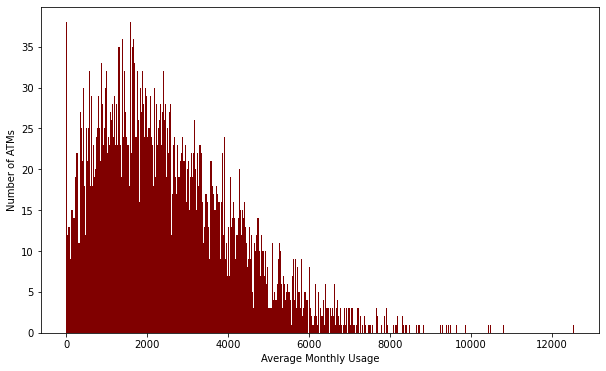

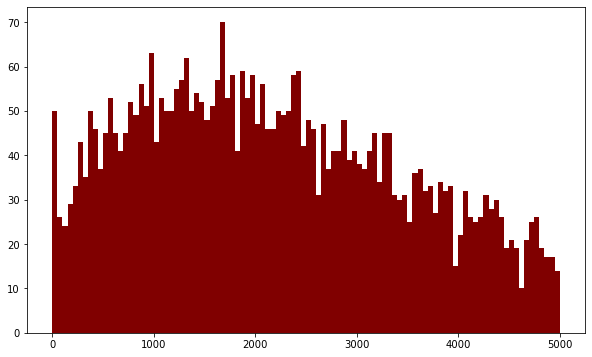

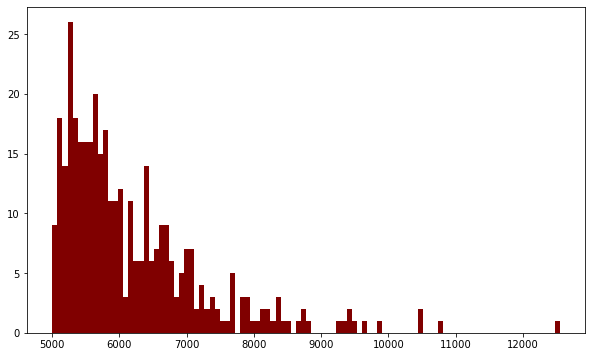

In [11]:
plt.figure(figsize = (10,6))
plt.hist(dataset["MONTHLY USAGE"], 500, color = "maroon")
plt.xlabel("Average Monthly Usage")
plt.ylabel("Number of ATMs")
plt.show()

plt.figure(figsize = (10,6))
plt.hist(dataset[dataset["MONTHLY USAGE"] <= 5000]["MONTHLY USAGE"],100, color = "maroon")
plt.show()

plt.figure(figsize = (10,6))
plt.hist(dataset[dataset["MONTHLY USAGE"] > 5000]["MONTHLY USAGE"],100, color = "maroon")
plt.show()

In [12]:
print(dataset.quantile(np.arange(0.0, 1.01, 0.05)))
dataset.quantile(np.arange(0.8, 1, 0.01))

      TOTAL USAGE  MONTHLY USAGE
0.00          1.0          1.000
0.05        809.4        330.175
0.10       1730.8        564.700
0.15       2775.2        802.125
0.20       3640.0       1005.400
0.25       4508.5       1221.500
0.30       5353.4       1418.000
0.35       6239.0       1631.700
0.40       7010.2       1820.700
0.45       7834.1       2021.575
0.50       8717.0       2245.500
0.55       9606.5       2446.350
0.60      10634.0       2703.500
0.65      11730.4       2966.950
0.70      12860.0       3249.400
0.75      14136.5       3569.250
0.80      15528.6       3898.300
0.85      17213.7       4311.250
0.90      19167.4       4807.050
0.95      22709.7       5677.425
1.00      50181.0      12545.250


,TOTAL USAGE,MONTHLY USAGE
0.80,15528.60,3898.300
0.81,15785.88,3988.640
0.82,16229.56,4073.000
0.83,16531.42,4153.525
0.84,16904.44,4242.250
0.85,17213.70,4311.250
0.86,17525.96,4388.780
0.87,17836.76,4474.345
0.88,18293.68,4583.060
0.89,18844.04,4715.750


In [13]:
print(dataset[dataset["MONTHLY USAGE"] > 5000]["MONTHLY USAGE"])
dataset[dataset["MONTHLY USAGE"] <= 5000]

ATM ID
1DBA06761    5755.75
1FDAJM29     7222.75
1FDBHL31     5158.00
1FDBOM151    5117.00
1FDBOM208    5390.50
              ...   
5DEN04861    6055.00
5DEN07202    6797.00
5DEN10998    6997.75
5DEN13272    5956.25
5DEN15522    5184.75
Name: MONTHLY USAGE, Length: 372, dtype: float64


,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE
ATM ID,,,,,,,
1DBA00013,CAPEX(DENA),ONSITE,MUMBAI ZONE,DBBMMO,SITE NOT UNDER SPECIAL CATEGORY,3373,843.25
1DBA00281,CAPEX(DENA),ONSITE,RAJKOT ZONE,DBAMRE,SITE NOT UNDER SPECIAL CATEGORY,8807,2201.75
1DBA00332,CAPEX(DENA),OFFSITE,RAJKOT ZONE,DBSURE,SITE NOT UNDER SPECIAL CATEGORY,8013,2003.25
1DBA00362,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSPIP,SITE NOT UNDER SPECIAL CATEGORY,4034,1008.50
1DBA00392,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DHARMA,SITE NOT UNDER SPECIAL CATEGORY,407,101.75
...,...,...,...,...,...,...,...
5DEN17472,OPEX(DENA),OFFSITE,AHMEDABAD ZONE,DBVAST,SITE NOT UNDER SPECIAL CATEGORY,8836,2209.00
5DEN17561,OPEX(DENA),OFFSITE,RAJKOT ZONE,DBSASA,SITE NOT UNDER SPECIAL CATEGORY,4854,1213.50
5DEN18771,OPEX(DENA),ONSITE,RAJKOT ZONE,DBDLIA,SITE NOT UNDER SPECIAL CATEGORY,3459,864.75


In [14]:
dataset[dataset["MONTHLY USAGE"] <= 5000]["Site Category"].value_counts()

SITE NOT UNDER SPECIAL CATEGORY    3451
OTHER                               203
E-LOBBY                             201
PETROL PUMP                          74
FUTURE GROUP                         26
FOREIGNER TOURIST PLACE              12
MTNL                                  8
EDUCATIONAL PLACE                     7
RAILWAY STATION                       6
RELIGIOUS PLACE                       4
BUS STAND                             4
MARKET                                4
HOSPITAL                              2
AIRPORT                               1
Name: Site Category, dtype: int64

In [22]:
round(dataset.groupby("Site Category")["MONTHLY USAGE"].mean().sort_values())

Site Category
MTNL                                858.0
AIRPORT                            1513.0
RAILWAY STATION                    1533.0
BUS STAND                          1622.0
FUTURE GROUP                       2076.0
PETROL PUMP                        2187.0
HOSPITAL                           2367.0
SITE NOT UNDER SPECIAL CATEGORY    2504.0
OTHER                              2662.0
EDUCATIONAL PLACE                  2780.0
E-LOBBY                            2946.0
FOREIGNER TOURIST PLACE            3294.0
MARKET                             3756.0
RELIGIOUS PLACE                    4363.0
Name: MONTHLY USAGE, dtype: float64

In [23]:
d = pd.merge(pd.DataFrame(dataset["Site Category"].value_counts()),pd.DataFrame(round(dataset.groupby("Site Category")["MONTHLY USAGE"].mean())), left_index = True, right_index = True)
d.columns = ["No.of ATMs", "Mean Average Monthly Usage"]
d

,No.of ATMs,Mean Average Monthly Usage
SITE NOT UNDER SPECIAL CATEGORY,3770,2504.0
E-LOBBY,226,2946.0
OTHER,222,2662.0
PETROL PUMP,77,2187.0
FUTURE GROUP,27,2076.0
FOREIGNER TOURIST PLACE,13,3294.0
MTNL,8,858.0
EDUCATIONAL PLACE,8,2780.0
MARKET,6,3756.0
RAILWAY STATION,6,1533.0


In [16]:
dataset[dataset["MONTHLY USAGE"] <= 5000].groupby("Site Category")["MONTHLY USAGE"].mean().sort_values()

Site Category
MTNL                                858.062500
AIRPORT                            1513.000000
RAILWAY STATION                    1532.666667
BUS STAND                          1622.562500
FUTURE GROUP                       1952.865385
PETROL PUMP                        2019.298423
SITE NOT UNDER SPECIAL CATEGORY    2162.608954
OTHER                              2349.240558
HOSPITAL                           2367.000000
EDUCATIONAL PLACE                  2458.821429
MARKET                             2484.375000
E-LOBBY                            2540.562604
FOREIGNER TOURIST PLACE            3078.729167
RELIGIOUS PLACE                    3971.562500
Name: MONTHLY USAGE, dtype: float64

In [24]:
dataset["MACHINE"].value_counts()

CAPEX            3388
CAPEX(VIJAYA)     341
CAPEX(DENA)       313
OPEX(DENA)        228
OPEX               76
BOB OPEX           29
Name: MACHINE, dtype: int64

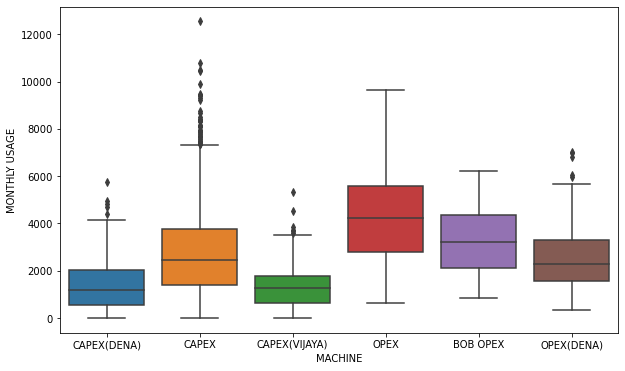

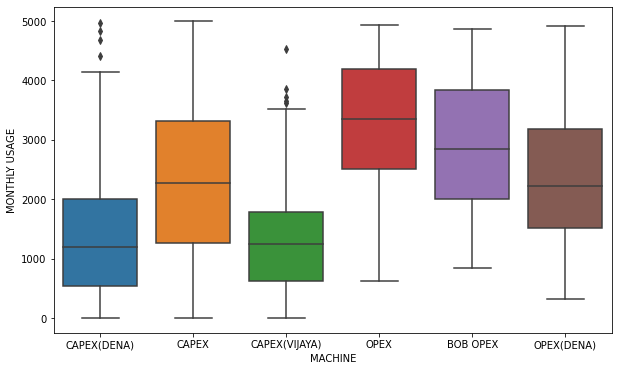

In [17]:
plt.figure(figsize = (10,6))
sns.boxplot(x = dataset["MACHINE"], y = dataset["MONTHLY USAGE"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = dataset[dataset["MONTHLY USAGE"] <= 5000]["MACHINE"], y = dataset[dataset["MONTHLY USAGE"] <= 5000]["MONTHLY USAGE"])
plt.show()

In [25]:
dataset["SITE"].value_counts()

ONSITE     2855
OFFSITE    1505
Name: SITE, dtype: int64

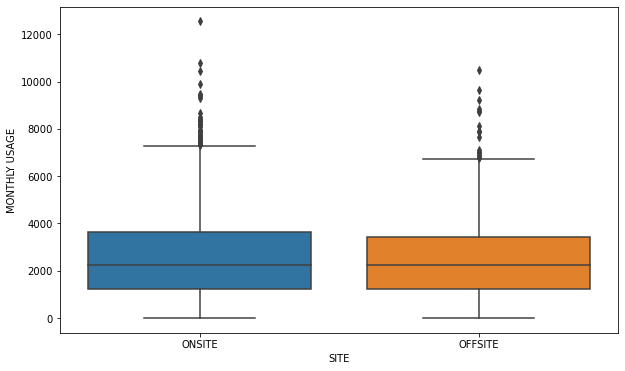

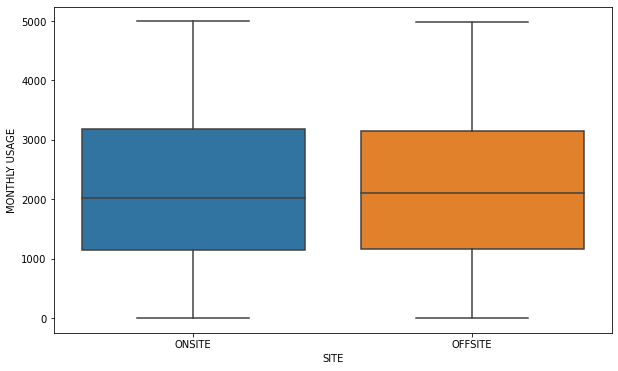

In [18]:
plt.figure(figsize = (10,6))
sns.boxplot(x = dataset["SITE"], y = dataset["MONTHLY USAGE"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = dataset[dataset["MONTHLY USAGE"] <= 5000]["SITE"], y = dataset[dataset["MONTHLY USAGE"] <= 5000]["MONTHLY USAGE"])
plt.show()

In [26]:
dataset["ZONE"].value_counts()

LUCKNOW ZONE      1115
JAIPUR ZONE       1028
AHMEDABAD ZONE     662
KOLKATA ZONE       643
MUMBAI ZONE        578
RAJKOT ZONE        349
Name: ZONE, dtype: int64

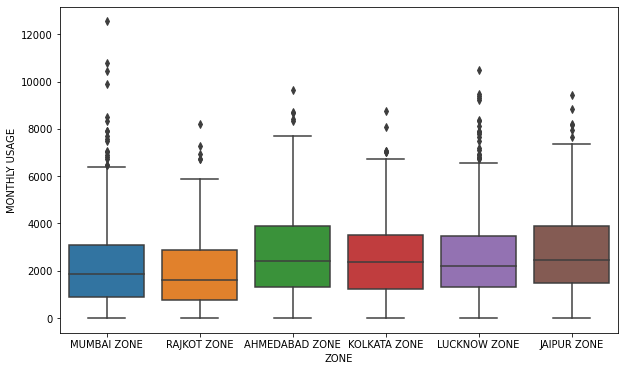

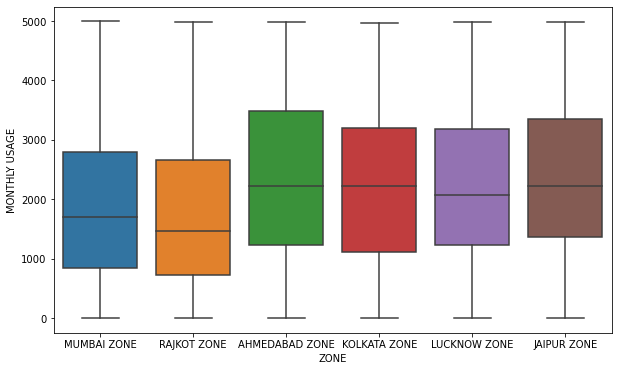

In [19]:
plt.figure(figsize = (10,6))
sns.boxplot(x = dataset["ZONE"], y = dataset["MONTHLY USAGE"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = dataset[dataset["MONTHLY USAGE"] <= 5000]["ZONE"], y = dataset[dataset["MONTHLY USAGE"] <= 5000]["MONTHLY USAGE"])
plt.show()

In [ ]:
## descriptive analysis with error data

In [35]:
error = pd.read_csv("Monthly error (priority 1).csv")
error = error.rename(columns = {error.columns[0]: "ATM ID"})
error = error.set_index("ATM ID")
error

,Month 1,Month 2,Month 3,Month 4
ATM ID,,,,
1FWBDN25,8,45,7,36
1RDDGKP02,20,89,12,93
1RDDKAN01,7,68,11,92
1RDDHMP01,9,11,2,60
1RDDLUC13,11,75,14,47
...,...,...,...,...
1CRHKOBL03,0,0,0,59
1VD734101,0,0,0,8
1FDBOM289,0,0,0,15


In [36]:
ticket = pd.read_csv("Monthly ticket.csv")
ticket = ticket.rename(columns = {ticket.columns[0]: "ATM ID"})
ticket = ticket.set_index("ATM ID")
ticket

,Month 1,Month 2,Month 3,Month 4
ATM ID,,,,
1RDDJAI26,8,5,0,2
1FNJNP09,11,10,2,0
1FNMAU06,1,5,11,21
1FNKAN98,7,10,10,14
1FDJDP44,6,5,9,16
...,...,...,...,...
1CRHUPVA04,0,0,0,1
1FNKAN106,0,0,0,1
1FNBNW15,0,0,0,3


In [77]:
error["Monthly Avg Error"] = round(error.mean(axis = 1),0)
error.head()

,Month 1,Month 2,Month 3,Month 4,Monthly Avg Error
ATM ID,,,,,
1FWBDN25,8,45,7,36,24.0
1RDDGKP02,20,89,12,93,54.0
1RDDKAN01,7,68,11,92,44.0
1RDDHMP01,9,11,2,60,20.0
1RDDLUC13,11,75,14,47,37.0


In [78]:
ticket["Monthly Avg Ticket"] = round(ticket.mean(axis = 1),0)
ticket.head()

,Month 1,Month 2,Month 3,Month 4,Monthly Avg Ticket
ATM ID,,,,,
1RDDJAI26,8,5,0,2,4.0
1FNJNP09,11,10,2,0,6.0
1FNMAU06,1,5,11,21,10.0
1FNKAN98,7,10,10,14,10.0
1FDJDP44,6,5,9,16,9.0


In [88]:
df = pd.merge(dataset, ticket["Monthly Avg Ticket"], right_index = True, left_index = True)
df = pd.merge(df, error["Monthly Avg Error"], right_index = True, left_index = True)
df#.head()

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE,Monthly Avg Ticket,Monthly Avg Error
ATM ID,,,,,,,,,
1DBA02691,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBHSOL,SITE NOT UNDER SPECIAL CATEGORY,7775,1944.0,3.0,16.0
1DBA03051,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBTLOD,SITE NOT UNDER SPECIAL CATEGORY,11045,2761.0,1.0,23.0
1DBA03301,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBHIMA,SITE NOT UNDER SPECIAL CATEGORY,19313,4828.0,5.0,26.0
1DBA03311,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBPRAN,SITE NOT UNDER SPECIAL CATEGORY,11195,2799.0,7.0,20.0
1DBA04021,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSHRT,SITE NOT UNDER SPECIAL CATEGORY,14050,3512.0,3.0,19.0
...,...,...,...,...,...,...,...,...,...
1VD716201,CAPEX(VIJAYA),ONSITE,LUCKNOW ZONE,BLYTHA,SITE NOT UNDER SPECIAL CATEGORY,687,172.0,0.0,10.0
1VD717601,CAPEX(VIJAYA),ONSITE,LUCKNOW ZONE,VJHAID,SITE NOT UNDER SPECIAL CATEGORY,425,106.0,5.0,26.0
1VW702401,CAPEX(VIJAYA),OFFSITE,JAIPUR ZONE,JODMAN,SITE NOT UNDER SPECIAL CATEGORY,2125,531.0,5.0,21.0


In [89]:
ticket.loc["1VW732201","Monthly Avg Ticket"], error.loc["1VW732201","Monthly Avg Error"]

(2.0, 26.0)

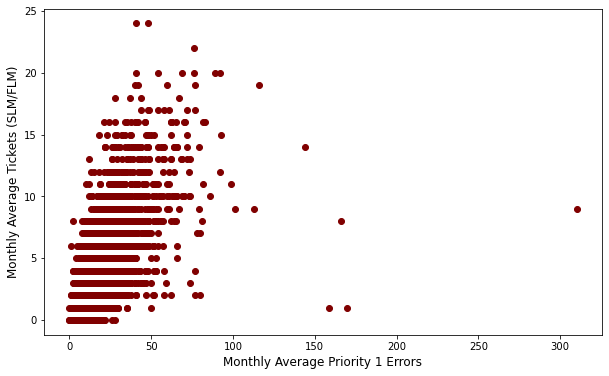

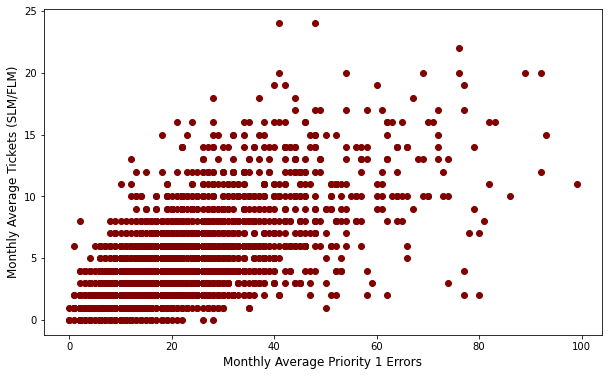

In [90]:
plt.figure(figsize = (10,6))
plt.scatter(df["Monthly Avg Error"], df["Monthly Avg Ticket"], color = "maroon")
plt.xlabel("Monthly Average Priority 1 Errors", size =12)
plt.ylabel("Monthly Average Tickets (SLM/FLM)", size =12)
plt.show()

plt.figure(figsize = (10,6))
plt.scatter(df[df["Monthly Avg Error"]<=100]["Monthly Avg Error"], df[df["Monthly Avg Error"]<=100]["Monthly Avg Ticket"], color = "maroon")
plt.xlabel("Monthly Average Priority 1 Errors", size =12)
plt.ylabel("Monthly Average Tickets (SLM/FLM)", size =12)
plt.show()

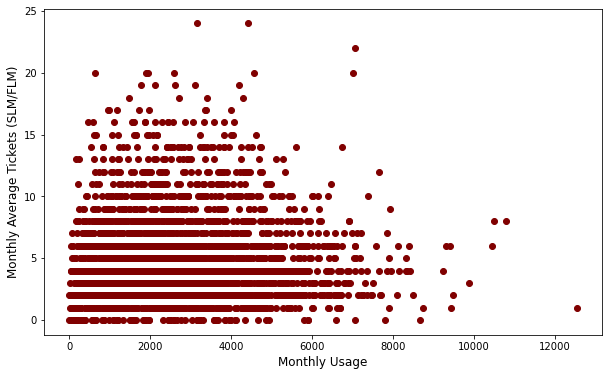

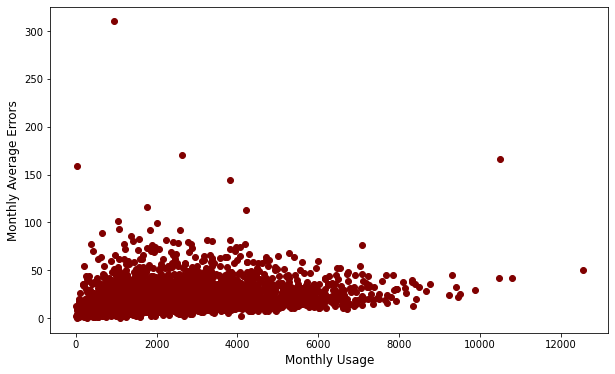

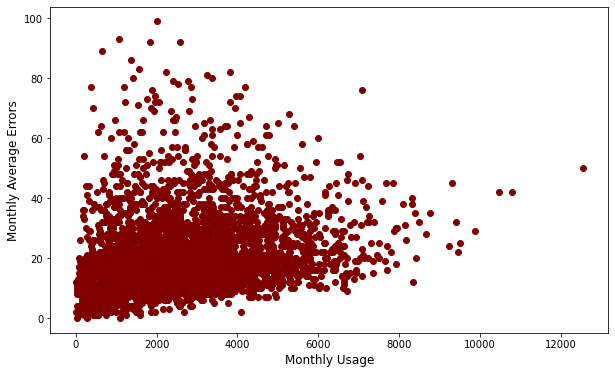

In [91]:
plt.figure(figsize = (10,6))
#plt.scatter(df[df["MONTHLY USAGE"]<=5000]["MONTHLY USAGE"], df[df["MONTHLY USAGE"]<=5000]["Weekly Avg Ticket"])
plt.scatter(df["MONTHLY USAGE"],df["Monthly Avg Ticket"], color = "maroon")
plt.xlabel("Monthly Usage", size =12)
plt.ylabel("Monthly Average Tickets (SLM/FLM)", size =12)
plt.show()

plt.figure(figsize = (10,6))
#plt.scatter(df[df["MONTHLY USAGE"]<=5000]["MONTHLY USAGE"], df[df["MONTHLY USAGE"]<=5000]["Weekly Avg Ticket"])
plt.scatter(df["MONTHLY USAGE"],df["Monthly Avg Error"], color = "maroon")
plt.xlabel("Monthly Usage", size =12)
plt.ylabel("Monthly Average Errors", size =12)
plt.show()
plt.figure(figsize = (10,6))
#plt.scatter(df[df["MONTHLY USAGE"]<=5000]["MONTHLY USAGE"], df[df["MONTHLY USAGE"]<=5000]["Weekly Avg Ticket"])
plt.scatter(df[df["Monthly Avg Error"]<=100]["MONTHLY USAGE"], df[df["Monthly Avg Error"]<=100]["Monthly Avg Error"], color = "maroon")
plt.xlabel("Monthly Usage", size =12)
plt.ylabel("Monthly Average Errors", size =12)
plt.show()

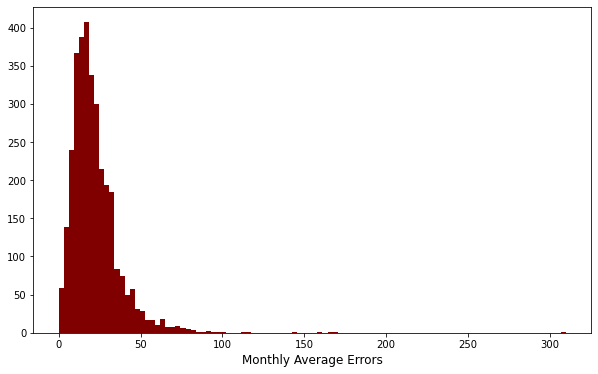

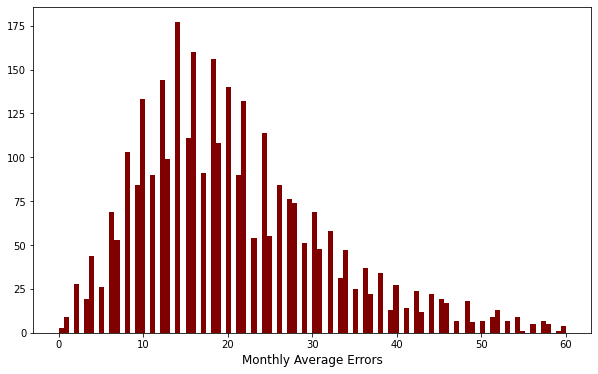

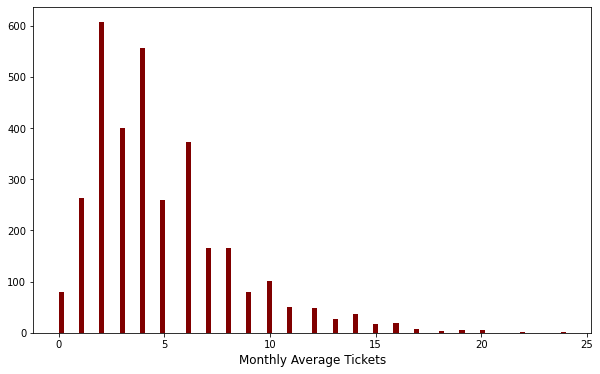

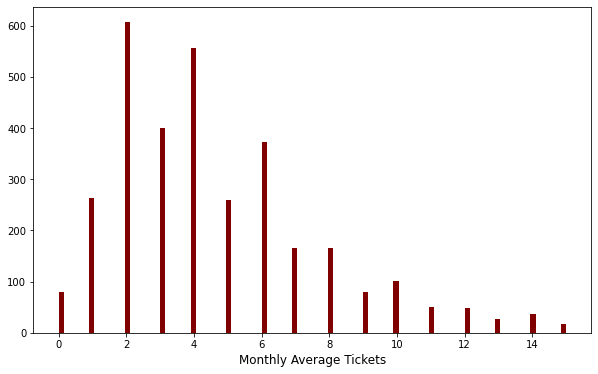

In [114]:
plt.figure(figsize = (10,6))
plt.hist(df["Monthly Avg Error"], 100, color= "maroon")
plt.xlabel("Monthly Average Errors", size = 12)
plt.show()
plt.figure(figsize = (10,6))
plt.hist(df[df["Monthly Avg Error"] <= 60]["Monthly Avg Error"], 100, color= "maroon")
plt.xlabel("Monthly Average Errors", size = 12)
plt.show()

plt.figure(figsize = (10,6))
plt.hist(df["Monthly Avg Ticket"], 100, color= "maroon")
plt.xlabel("Monthly Average Tickets", size = 12)
plt.show()
plt.figure(figsize = (10,6))
plt.hist(df[df["Monthly Avg Ticket"]<=15]["Monthly Avg Ticket"], 100, color= "maroon")
plt.xlabel("Monthly Average Tickets", size = 12)
plt.show()

In [104]:
df[df["Monthly Avg Error"]>300]

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE,Monthly Avg Ticket,Monthly Avg Error
ATM ID,,,,,,,,,
1FDFZB41,CAPEX,ONSITE,LUCKNOW ZONE,SIHORI,SITE NOT UNDER SPECIAL CATEGORY,3832,958.0,9.0,310.0


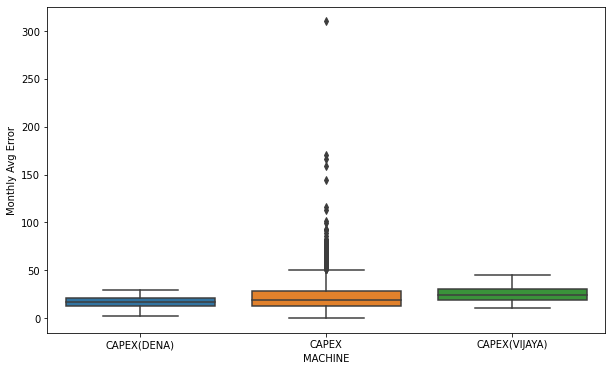

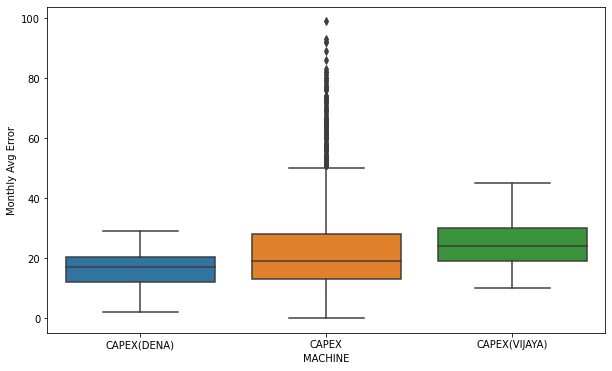

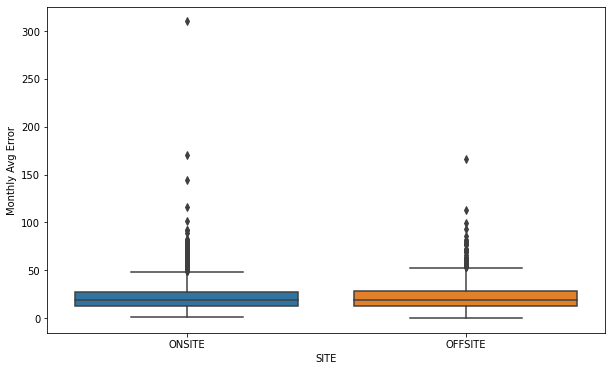

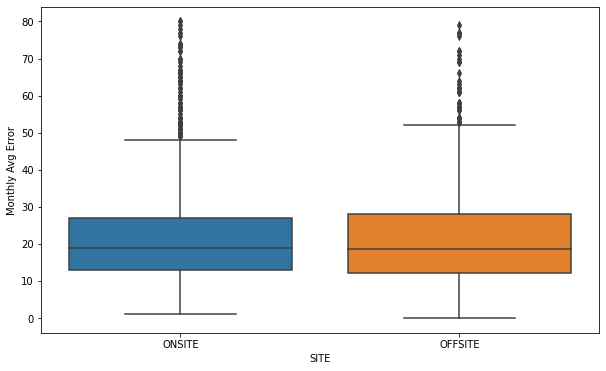

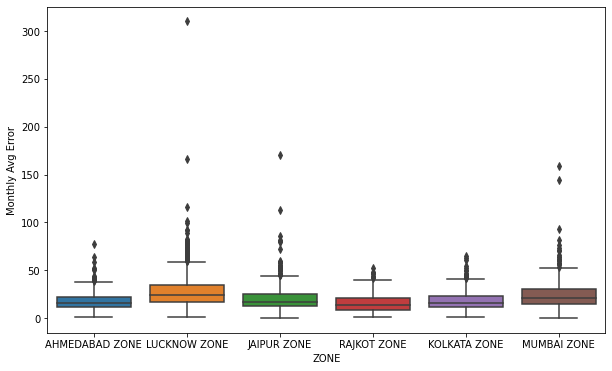

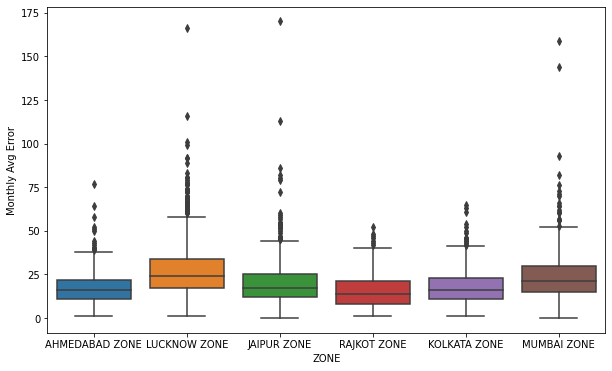

In [107]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df["Monthly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df[df["Monthly Avg Error"]<=100]["Monthly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["SITE"], y = df["Monthly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["SITE"], y = df[df["Monthly Avg Error"]<=80]["Monthly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["ZONE"], y = df["Monthly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["ZONE"], y = df[df["Monthly Avg Error"]<=300]["Monthly Avg Error"])
plt.show()

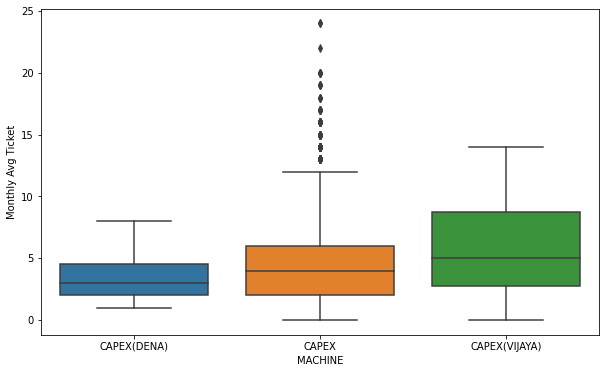

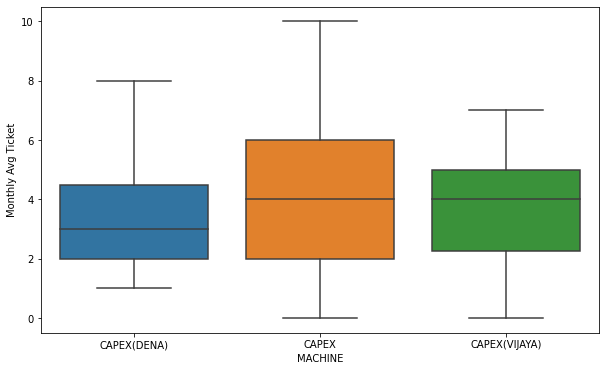

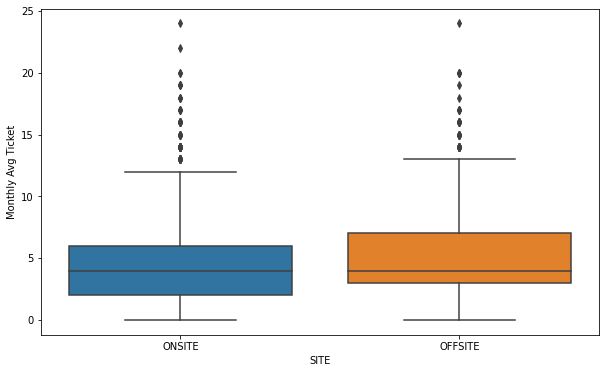

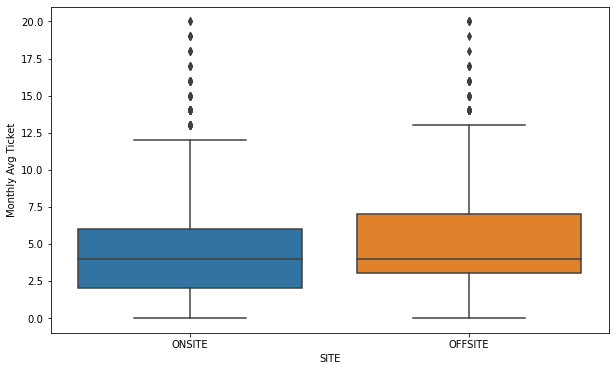

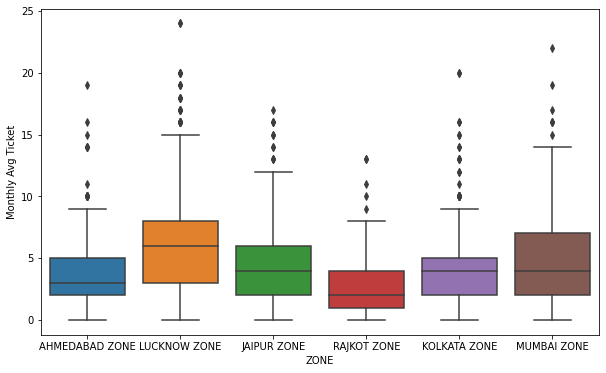

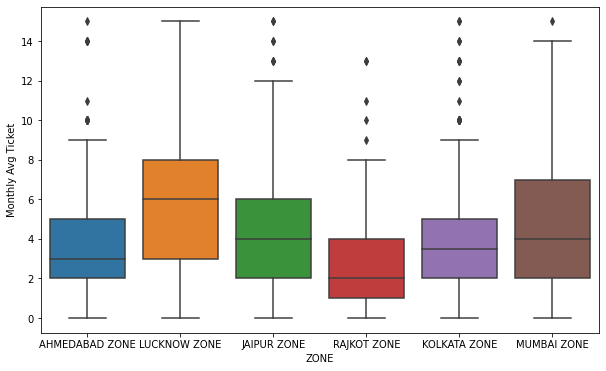

In [106]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df["Monthly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df[df["Monthly Avg Ticket"]<=10]["Monthly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["SITE"], y = df["Monthly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["SITE"], y = df[df["Monthly Avg Ticket"]<=20]["Monthly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["ZONE"], y = df["Monthly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["ZONE"], y = df[df["Monthly Avg Ticket"]<=15]["Monthly Avg Ticket"])
plt.show()

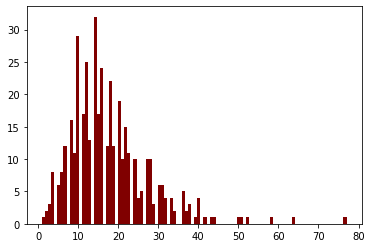

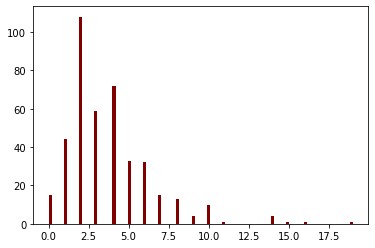

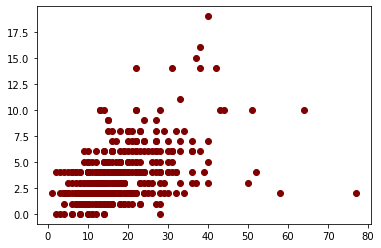

In [94]:
ahm = df[df["ZONE"]=="AHMEDABAD ZONE"]
plt.hist(ahm["Monthly Avg Error"],100, color = "maroon")
plt.show()
plt.hist(ahm["Monthly Avg Ticket"],100, color = "maroon")
plt.show()
plt.scatter(ahm["Monthly Avg Error"],ahm["Monthly Avg Ticket"], color = "maroon")

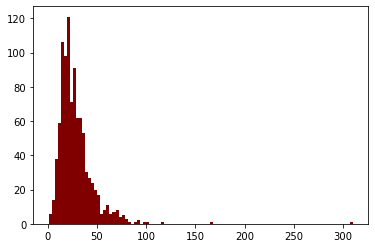

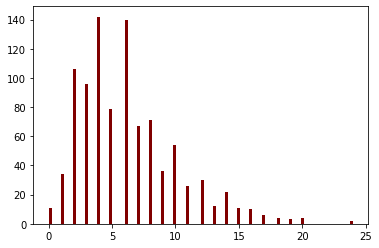

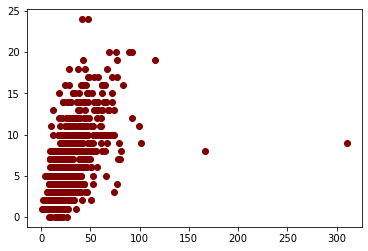

In [95]:
ahm = df[df["ZONE"]=="LUCKNOW ZONE"]
plt.hist(ahm["Monthly Avg Error"],100, color = "maroon")
plt.show()
plt.hist(ahm["Monthly Avg Ticket"],100, color = "maroon")
plt.show()
plt.scatter(ahm["Monthly Avg Error"],ahm["Monthly Avg Ticket"], color = "maroon")

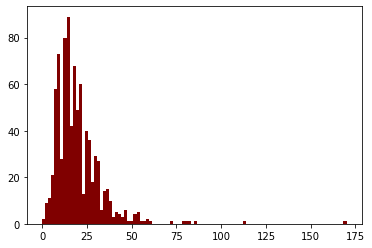

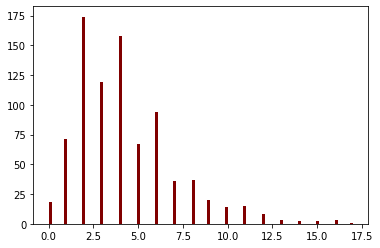

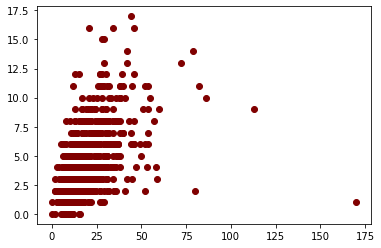

In [96]:
ahm = df[df["ZONE"]=="JAIPUR ZONE"]
plt.hist(ahm["Monthly Avg Error"],100, color = "maroon")
plt.show()
plt.hist(ahm["Monthly Avg Ticket"],100, color = "maroon")
plt.show()
plt.scatter(ahm["Monthly Avg Error"],ahm["Monthly Avg Ticket"], color = "maroon")

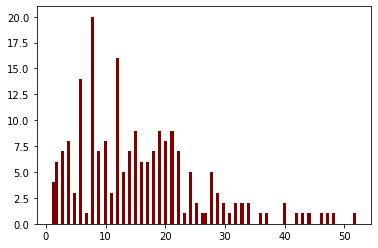

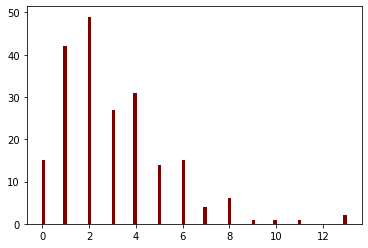

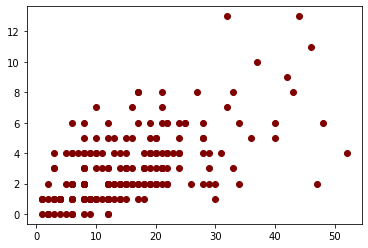

In [97]:
ahm = df[df["ZONE"]=="RAJKOT ZONE"]
plt.hist(ahm["Monthly Avg Error"],100, color = "maroon")
plt.show()
plt.hist(ahm["Monthly Avg Ticket"],100, color = "maroon")
plt.show()
plt.scatter(ahm["Monthly Avg Error"],ahm["Monthly Avg Ticket"], color = "maroon")

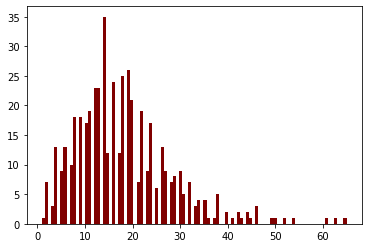

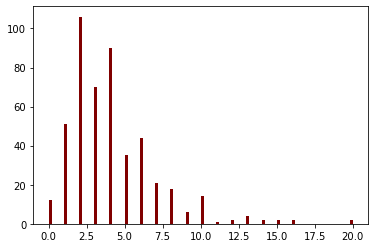

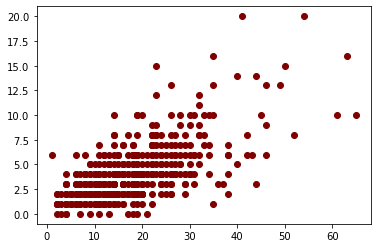

In [98]:
ahm = df[df["ZONE"]=="KOLKATA ZONE"]
plt.hist(ahm["Monthly Avg Error"],100, color = "maroon")
plt.show()
plt.hist(ahm["Monthly Avg Ticket"],100, color = "maroon")
plt.show()
plt.scatter(ahm["Monthly Avg Error"],ahm["Monthly Avg Ticket"], color = "maroon")

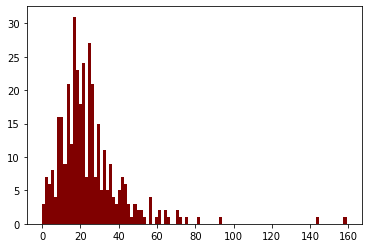

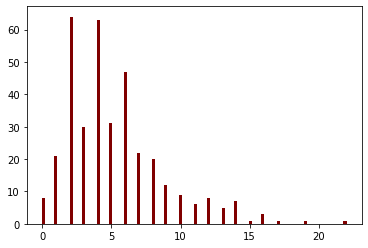

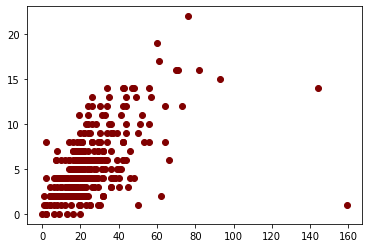

In [99]:
ahm = df[df["ZONE"]=="MUMBAI ZONE"]
plt.hist(ahm["Monthly Avg Error"],100, color = "maroon")
plt.show()
plt.hist(ahm["Monthly Avg Ticket"],100, color = "maroon")
plt.show()
plt.scatter(ahm["Monthly Avg Error"],ahm["Monthly Avg Ticket"], color = "maroon")

In [30]:
df.loc[(df["Weekly Avg Error"] <= 25) & (df["Weekly Avg Ticket"] <= 3)]

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE,Weekly Avg Ticket,Weekly Avg Error
ATM ID,,,,,,,,,
1DBA02691,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBHSOL,SITE NOT UNDER SPECIAL CATEGORY,7775,1943.75,0.722,8.111
1DBA03051,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBTLOD,SITE NOT UNDER SPECIAL CATEGORY,11045,2761.25,0.333,11.500
1DBA03301,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBHIMA,SITE NOT UNDER SPECIAL CATEGORY,19313,4828.25,1.111,17.000
1DBA03311,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBPRAN,SITE NOT UNDER SPECIAL CATEGORY,11195,2798.75,1.722,10.000
1DBA04021,CAPEX(DENA),ONSITE,AHMEDABAD ZONE,DBSHRT,SITE NOT UNDER SPECIAL CATEGORY,14050,3512.50,0.722,10.111
...,...,...,...,...,...,...,...,...,...
1VD704901,CAPEX(VIJAYA),OFFSITE,JAIPUR ZONE,JAICOM,SITE NOT UNDER SPECIAL CATEGORY,127,63.50,2.833,4.389
1VD716201,CAPEX(VIJAYA),ONSITE,LUCKNOW ZONE,BLYTHA,SITE NOT UNDER SPECIAL CATEGORY,687,171.75,0.111,3.722
1VD717601,CAPEX(VIJAYA),ONSITE,LUCKNOW ZONE,VJHAID,SITE NOT UNDER SPECIAL CATEGORY,425,106.25,1.722,8.778


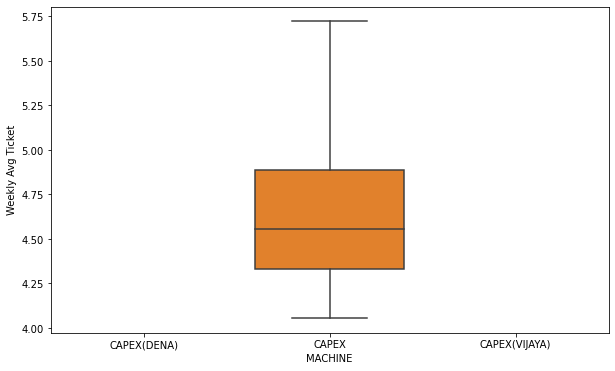

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE,Weekly Avg Ticket,Weekly Avg Error
ATM ID,,,,,,,,,
1FDABN38,CAPEX,ONSITE,LUCKNOW ZONE,DAULAT,SITE NOT UNDER SPECIAL CATEGORY,4398,1099.50,3.889,14.444
1FDAJM25,CAPEX,ONSITE,JAIPUR ZONE,MAYAJM,SITE NOT UNDER SPECIAL CATEGORY,6627,1656.75,3.444,8.000
1FDAJM57,CAPEX,OFFSITE,JAIPUR ZONE,SARADH,SITE NOT UNDER SPECIAL CATEGORY,8449,2112.25,4.056,16.722
1FDAZM09,CAPEX,ONSITE,LUCKNOW ZONE,BIJAUR,SITE NOT UNDER SPECIAL CATEGORY,17485,4371.25,3.278,21.500
1FDBAH01,CAPEX,ONSITE,LUCKNOW ZONE,KAISAR,SITE NOT UNDER SPECIAL CATEGORY,4813,1203.25,3.889,26.500
...,...,...,...,...,...,...,...,...,...
1RDWPTP04,CAPEX,ONSITE,LUCKNOW ZONE,ANTU,SITE NOT UNDER SPECIAL CATEGORY,6409,1602.25,4.222,15.778
1RDWUDP12,CAPEX,OFFSITE,JAIPUR ZONE,UDAIPU,SITE NOT UNDER SPECIAL CATEGORY,3437,859.25,3.500,11.722
1RNDAZM06,CAPEX,ONSITE,LUCKNOW ZONE,ANWABS,SITE NOT UNDER SPECIAL CATEGORY,4878,1219.50,4.111,10.667


In [37]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df[df["Weekly Avg Ticket"]>4]["Weekly Avg Ticket"])
plt.show()

df[df["Weekly Avg Ticket"]>3]

In [32]:
df.loc[(df["Weekly Avg Error"] > 25) | (df["Weekly Avg Ticket"] > 3)]

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE,Weekly Avg Ticket,Weekly Avg Error
ATM ID,,,,,,,,,
1FDABN38,CAPEX,ONSITE,LUCKNOW ZONE,DAULAT,SITE NOT UNDER SPECIAL CATEGORY,4398,1099.50,3.889,14.444
1FDAJM25,CAPEX,ONSITE,JAIPUR ZONE,MAYAJM,SITE NOT UNDER SPECIAL CATEGORY,6627,1656.75,3.444,8.000
1FDAJM27,CAPEX,OFFSITE,JAIPUR ZONE,SAVAJM,SITE NOT UNDER SPECIAL CATEGORY,9674,2418.50,3.000,30.611
1FDAJM29,CAPEX,ONSITE,JAIPUR ZONE,UDAIRO,E-LOBBY,28891,7222.75,2.056,30.556
1FDAJM57,CAPEX,OFFSITE,JAIPUR ZONE,SARADH,SITE NOT UNDER SPECIAL CATEGORY,8449,2112.25,4.056,16.722
...,...,...,...,...,...,...,...,...,...
1RDWUDP12,CAPEX,OFFSITE,JAIPUR ZONE,UDAIPU,SITE NOT UNDER SPECIAL CATEGORY,3437,859.25,3.500,11.722
1RDWVAR29,CAPEX,OFFSITE,LUCKNOW ZONE,LANKA,SITE NOT UNDER SPECIAL CATEGORY,41983,10495.75,1.722,50.000
1RNDAZM06,CAPEX,ONSITE,LUCKNOW ZONE,ANWABS,SITE NOT UNDER SPECIAL CATEGORY,4878,1219.50,4.111,10.667


In [31]:
df[df["Weekly Avg Ticket"]>3]

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE,Weekly Avg Ticket,Weekly Avg Error
ATM ID,,,,,,,,,
1FDABN38,CAPEX,ONSITE,LUCKNOW ZONE,DAULAT,SITE NOT UNDER SPECIAL CATEGORY,4398,1099.50,3.889,14.444
1FDAJM25,CAPEX,ONSITE,JAIPUR ZONE,MAYAJM,SITE NOT UNDER SPECIAL CATEGORY,6627,1656.75,3.444,8.000
1FDAJM57,CAPEX,OFFSITE,JAIPUR ZONE,SARADH,SITE NOT UNDER SPECIAL CATEGORY,8449,2112.25,4.056,16.722
1FDAZM09,CAPEX,ONSITE,LUCKNOW ZONE,BIJAUR,SITE NOT UNDER SPECIAL CATEGORY,17485,4371.25,3.278,21.500
1FDBAH01,CAPEX,ONSITE,LUCKNOW ZONE,KAISAR,SITE NOT UNDER SPECIAL CATEGORY,4813,1203.25,3.889,26.500
...,...,...,...,...,...,...,...,...,...
1RDWPTP04,CAPEX,ONSITE,LUCKNOW ZONE,ANTU,SITE NOT UNDER SPECIAL CATEGORY,6409,1602.25,4.222,15.778
1RDWUDP12,CAPEX,OFFSITE,JAIPUR ZONE,UDAIPU,SITE NOT UNDER SPECIAL CATEGORY,3437,859.25,3.500,11.722
1RNDAZM06,CAPEX,ONSITE,LUCKNOW ZONE,ANWABS,SITE NOT UNDER SPECIAL CATEGORY,4878,1219.50,4.111,10.667


In [33]:
df[df["Weekly Avg Error"]>25]

,MACHINE,SITE,ZONE,BRANCH_ALPHA,Site Category,TOTAL USAGE,MONTHLY USAGE,Weekly Avg Ticket,Weekly Avg Error
ATM ID,,,,,,,,,
1FDAJM27,CAPEX,OFFSITE,JAIPUR ZONE,SAVAJM,SITE NOT UNDER SPECIAL CATEGORY,9674,2418.50,3.000,30.611
1FDAJM29,CAPEX,ONSITE,JAIPUR ZONE,UDAIRO,E-LOBBY,28891,7222.75,2.056,30.556
1FDALD130,CAPEX,OFFSITE,LUCKNOW ZONE,PHAPHA,FUTURE GROUP,10628,2657.00,2.111,29.778
1FDBAH01,CAPEX,ONSITE,LUCKNOW ZONE,KAISAR,SITE NOT UNDER SPECIAL CATEGORY,4813,1203.25,3.889,26.500
1FDBAN03,CAPEX,ONSITE,LUCKNOW ZONE,KALUKU,SITE NOT UNDER SPECIAL CATEGORY,16969,4242.25,3.611,28.889
...,...,...,...,...,...,...,...,...,...
1RDWAHM53,CAPEX,ONSITE,AHMEDABAD ZONE,MOTERA,SITE NOT UNDER SPECIAL CATEGORY,20769,5192.25,2.833,26.944
1RDWBDN02,CAPEX,ONSITE,KOLKATA ZONE,KALNA,SITE NOT UNDER SPECIAL CATEGORY,32370,8092.50,1.444,27.722
1RDWKOL70,CAPEX,OFFSITE,KOLKATA ZONE,SODEPU,SITE NOT UNDER SPECIAL CATEGORY,28079,7019.75,4.667,30.167
